___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [70]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [71]:
df = df.set_index('RowNumber')
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1              0.000              1          1               1   
2          83807.860              1          0               1   
3         159660.800              3          1               0   
4              0.000              2          0               0   
5         125510.820              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1               101348.880       1  
2               112542.580       0  
3               113931.570       1  
4                93826.630       0  
5                79084.100       0

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [73]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
df.describe().T

count         mean       std          min          25%  \
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [75]:
df.shape

(10000, 13)

In [76]:
df.duplicated().sum()

0

In [77]:
df = df.drop(['CustomerId', 'Surname'], axis=1)

In [78]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

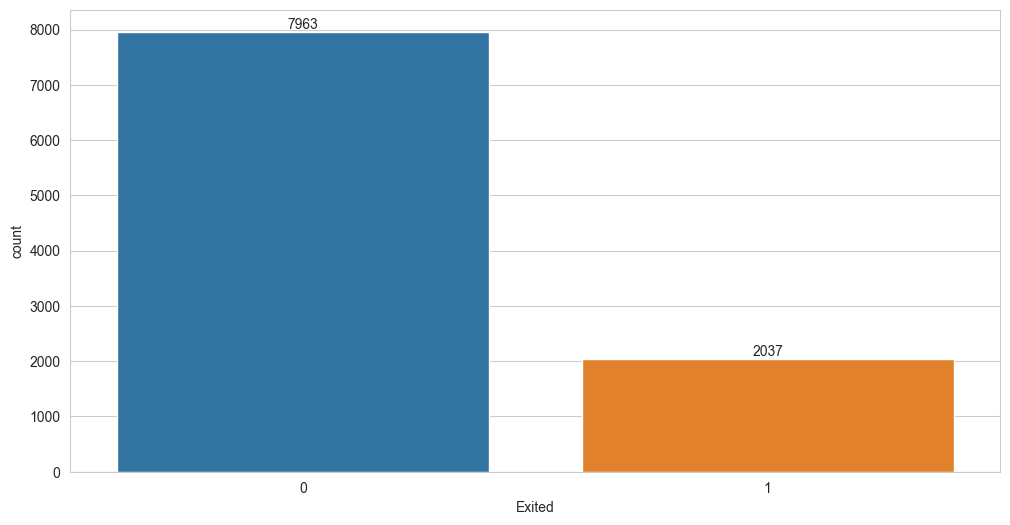

In [79]:
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0]);

In [80]:
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

Geography has 3 unique value
Gender has 2 unique value


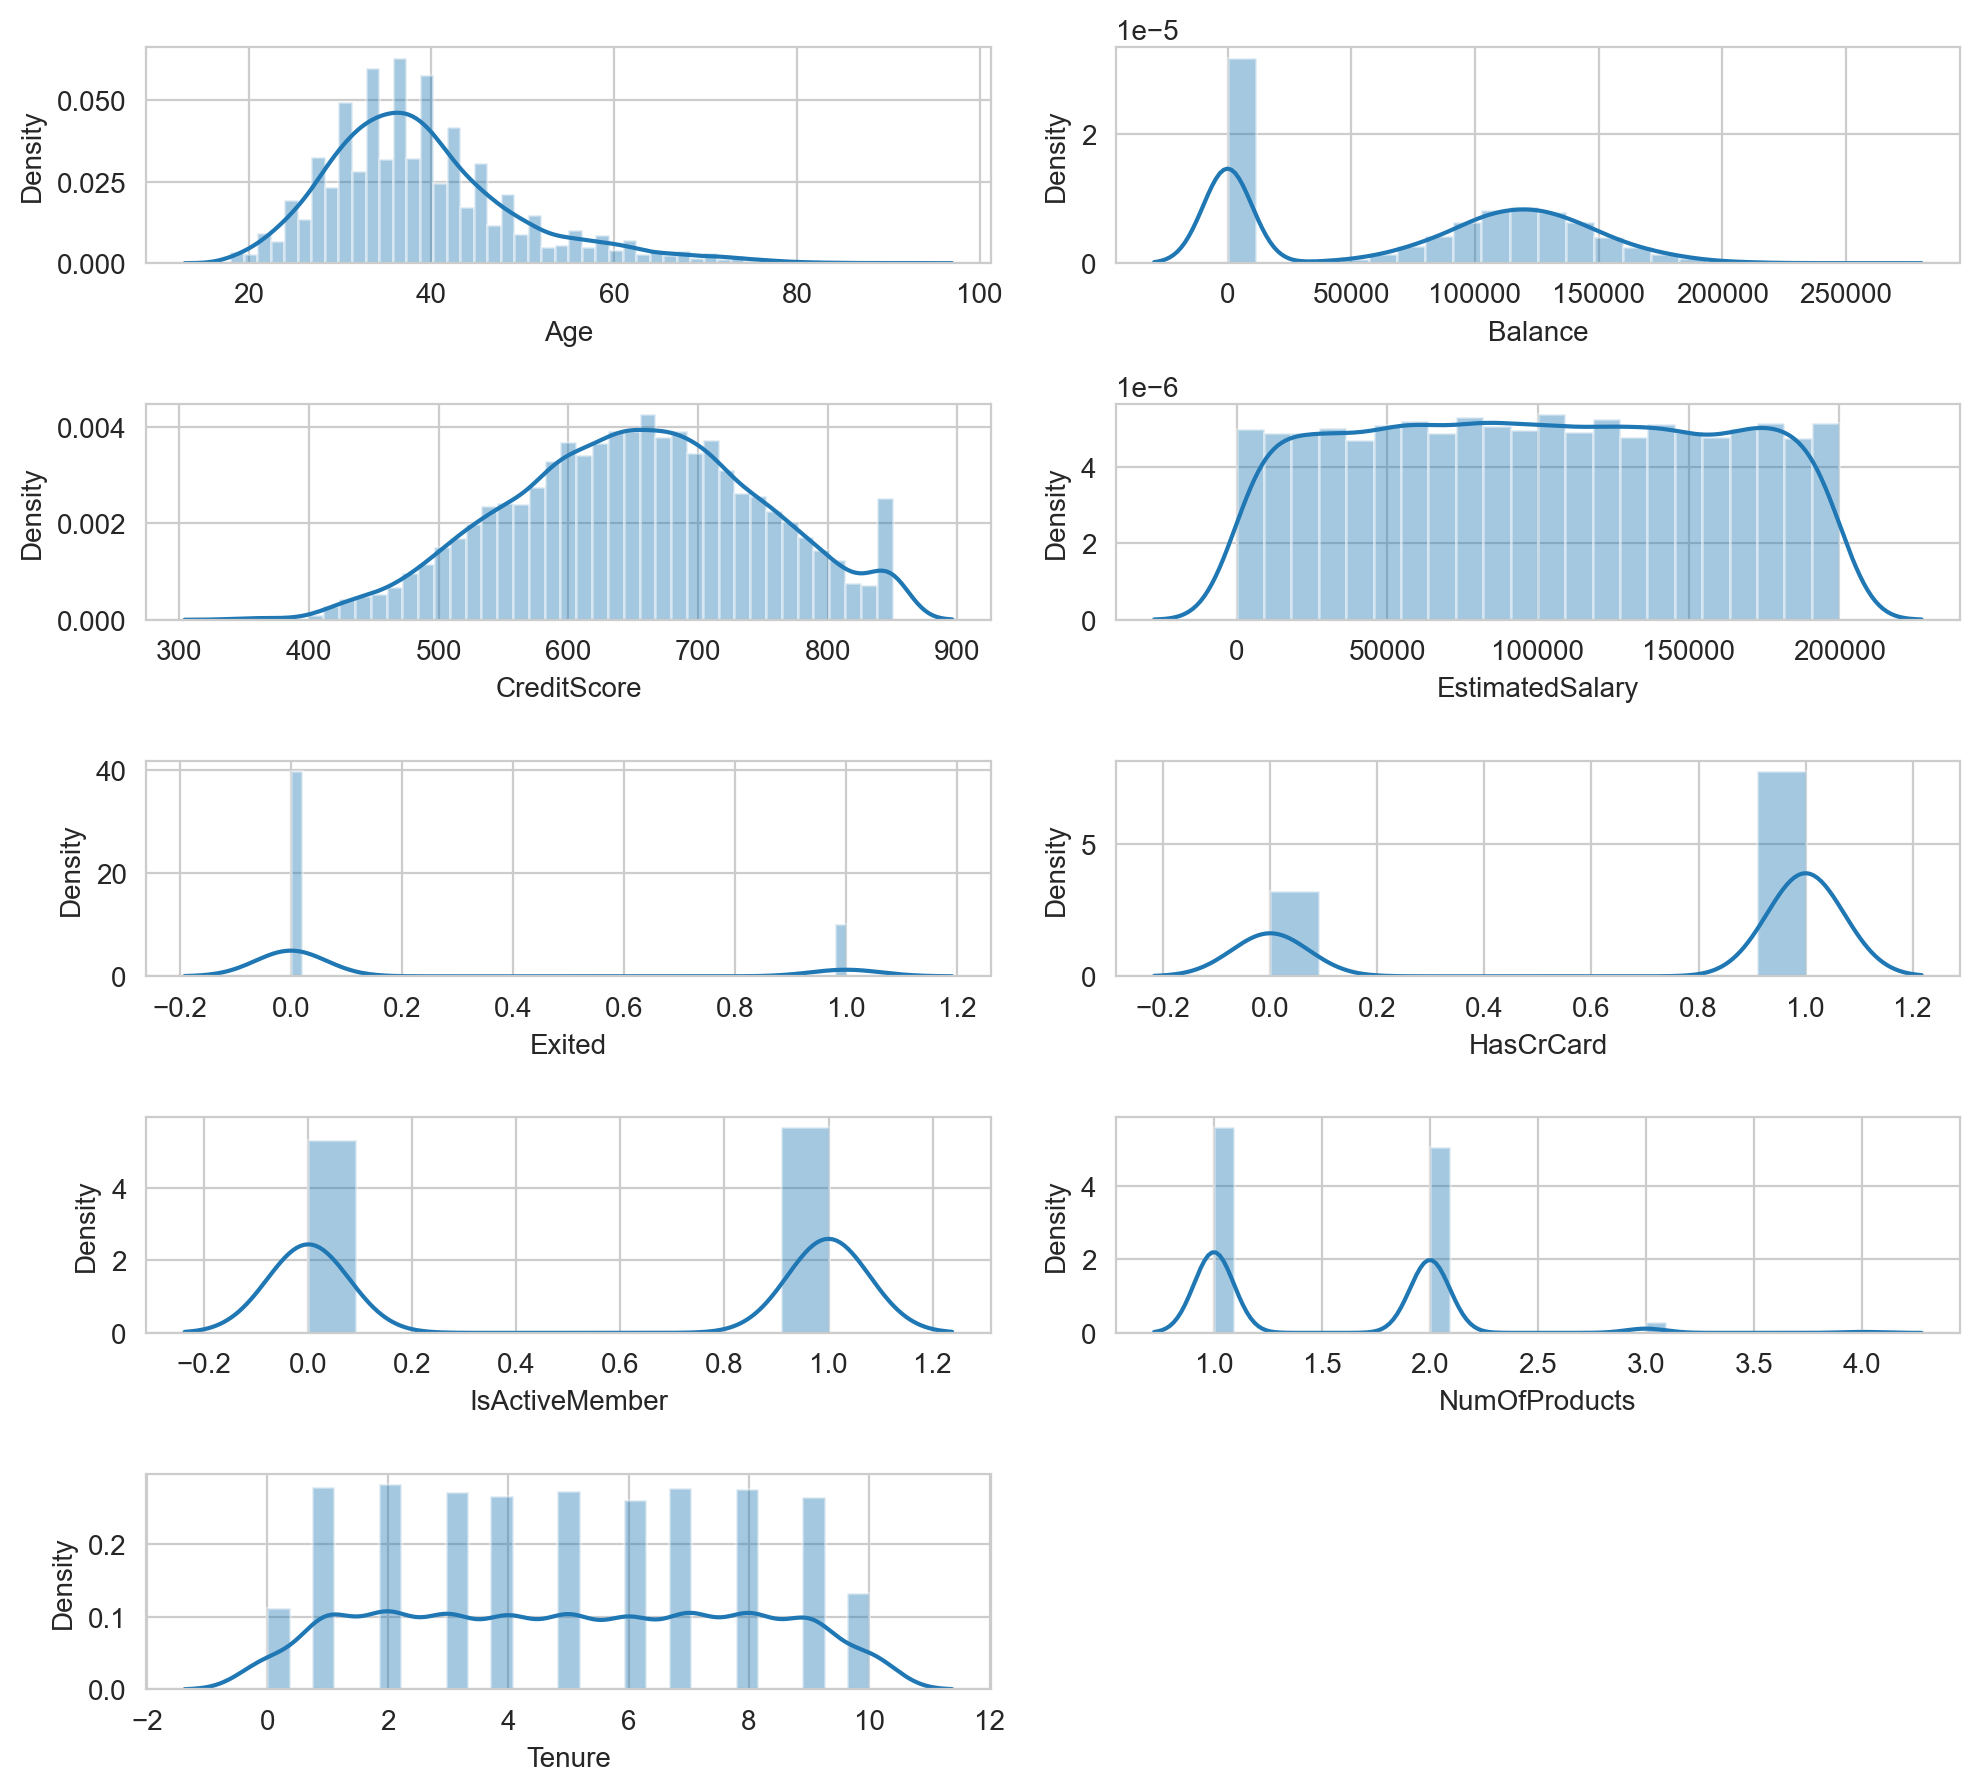

In [81]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.select_dtypes("int")[:-1] | df.select_dtypes("float")[:-1]):
        plt.subplot(8,2,i+1)
        sns.distplot(df[col],)
plt.tight_layout();

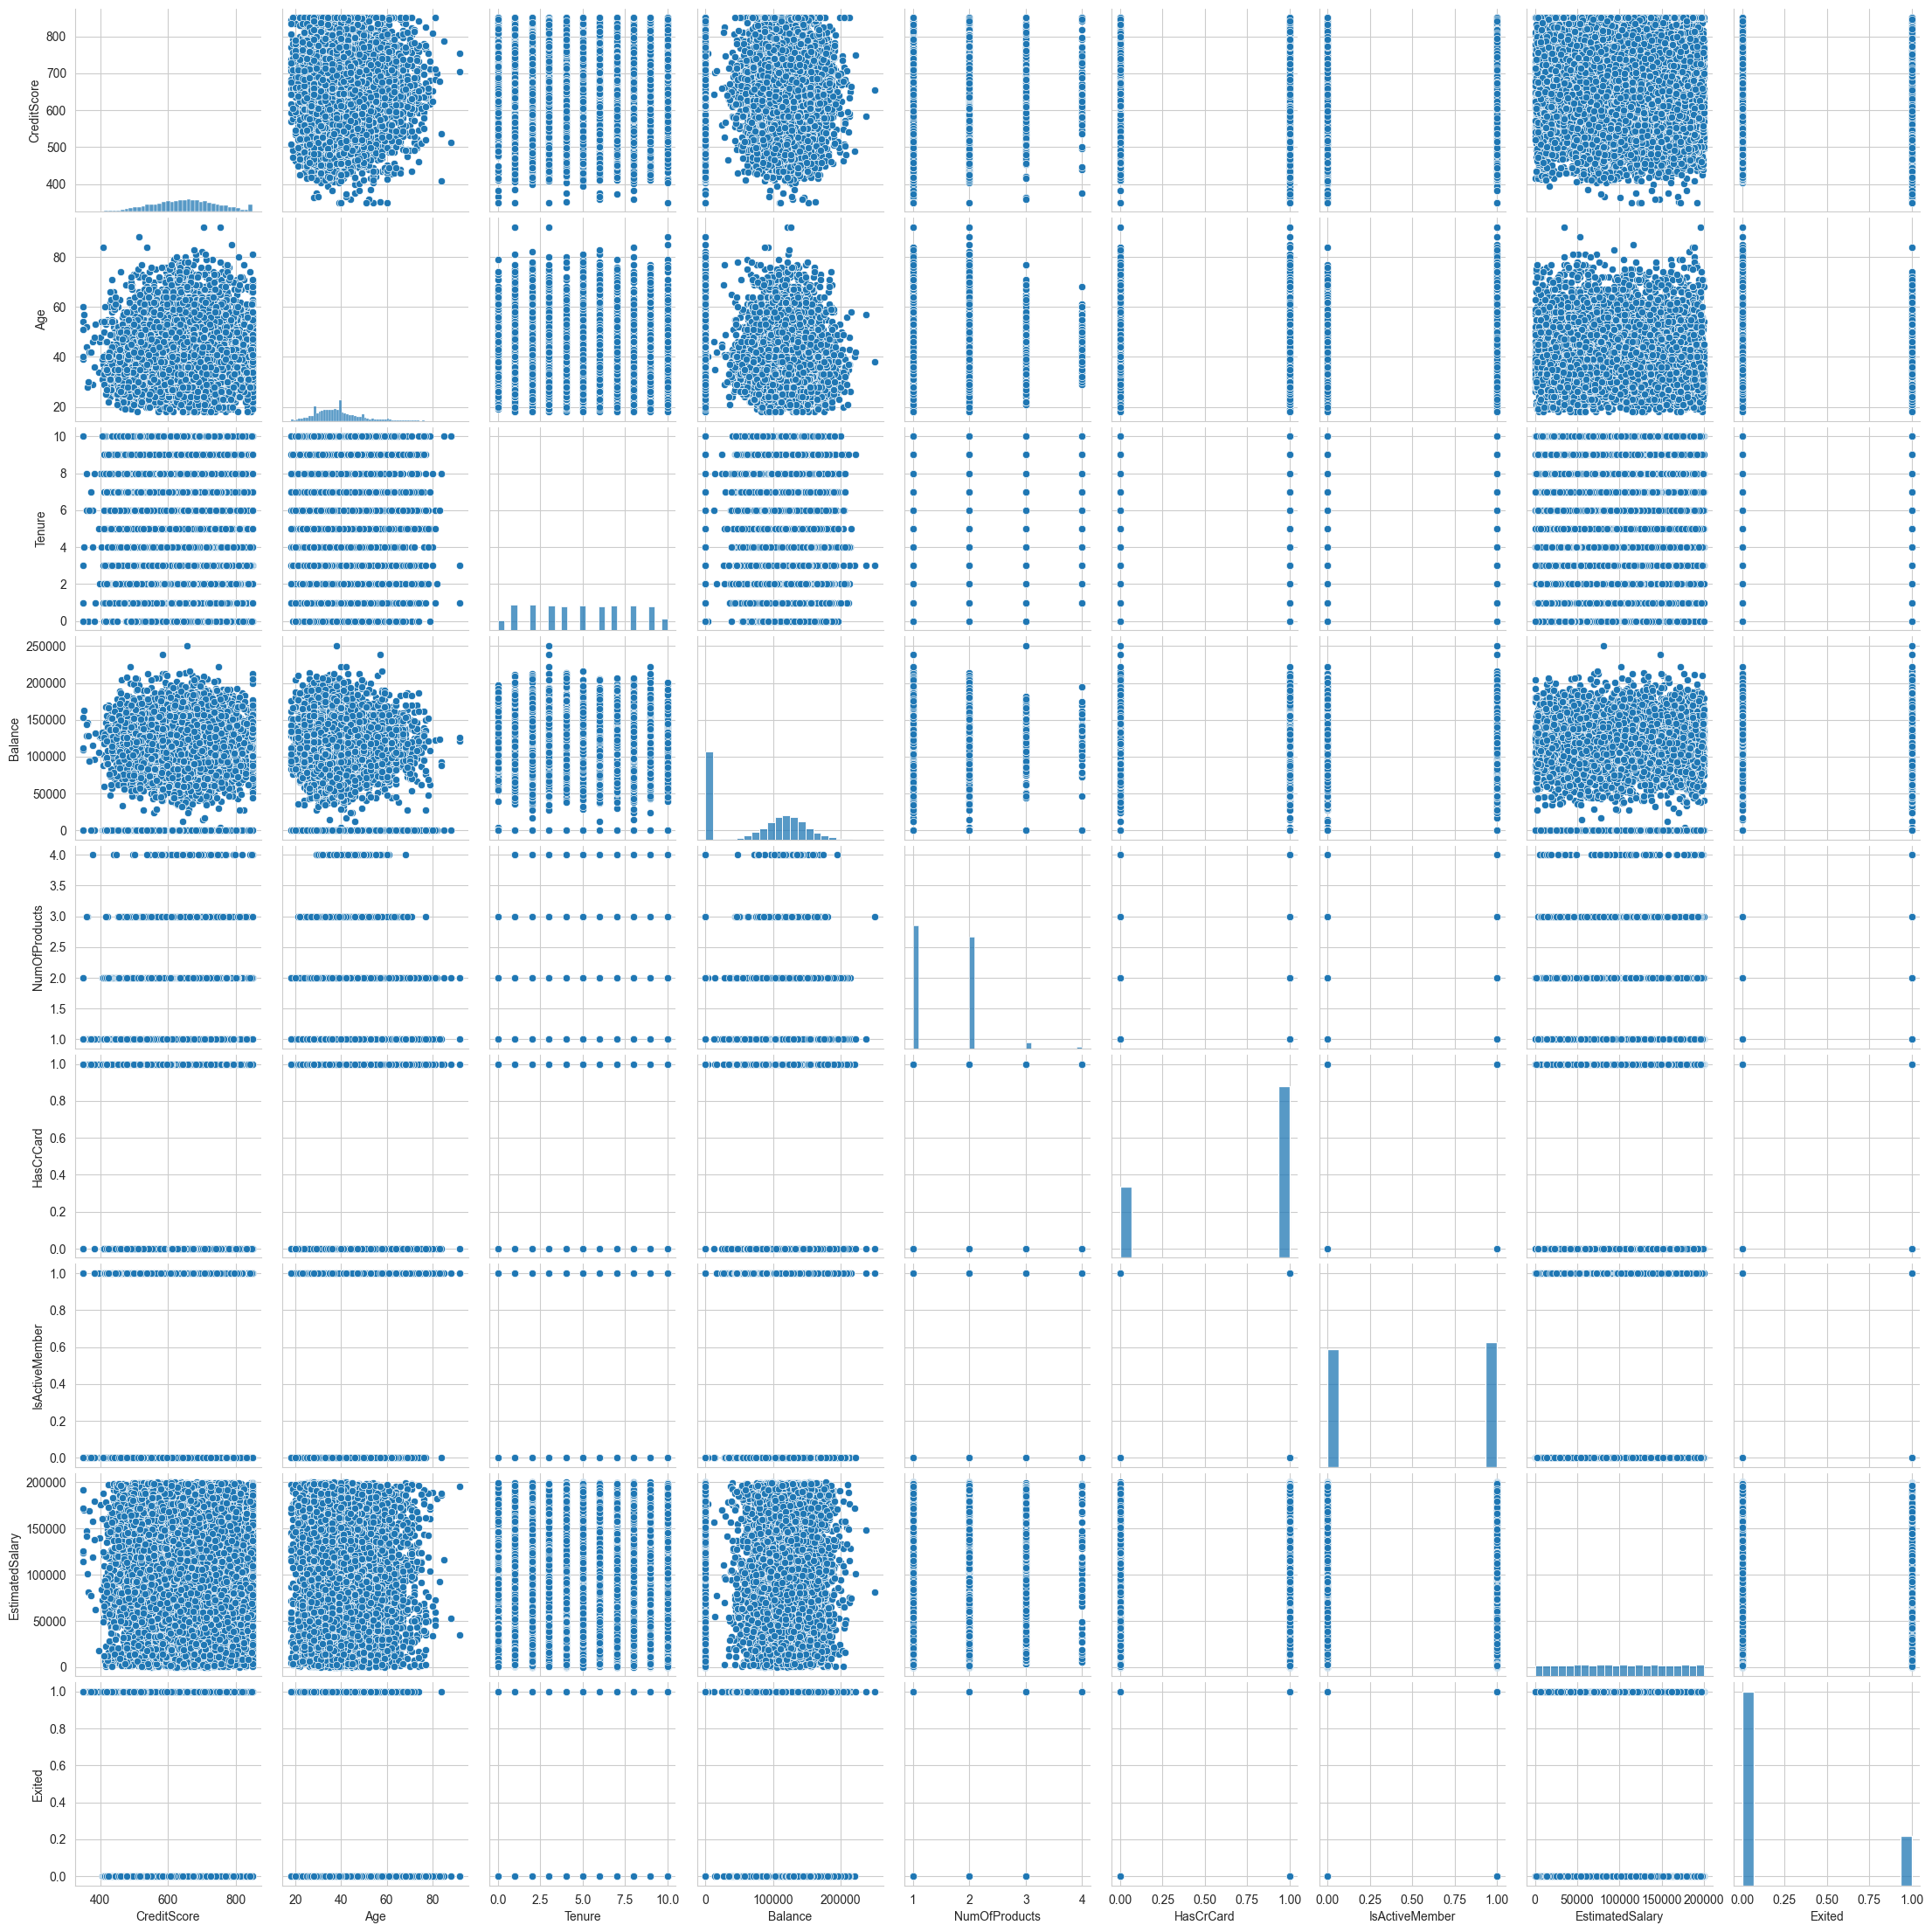

In [82]:
sns.pairplot(df)

<Axes: >

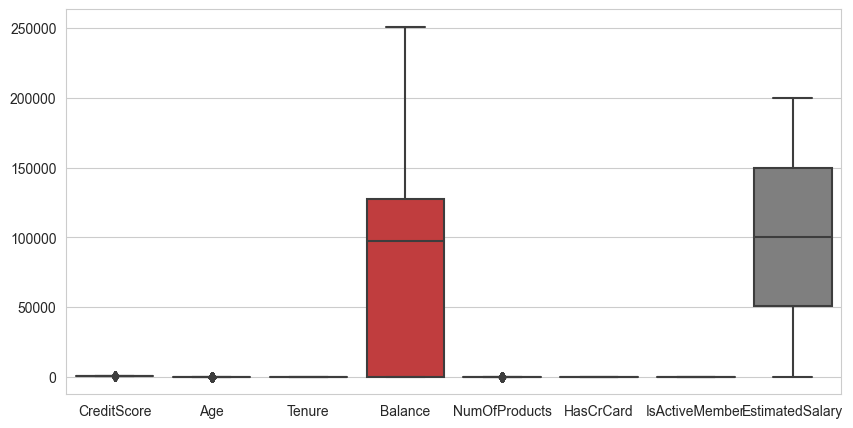

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("Exited", axis=1))

In [85]:
from ipywidgets import widgets, interact
def column_box(col):
    sns.boxplot(data = df,
                y= df[col], 
                x=df["Exited"], 
                palette='Dark2')
cols = df.columns
interact(column_box, col=cols);

interactive(children=(Dropdown(description='col', options=('CreditScore', 'Geography', 'Gender', 'Age', 'Tenur…

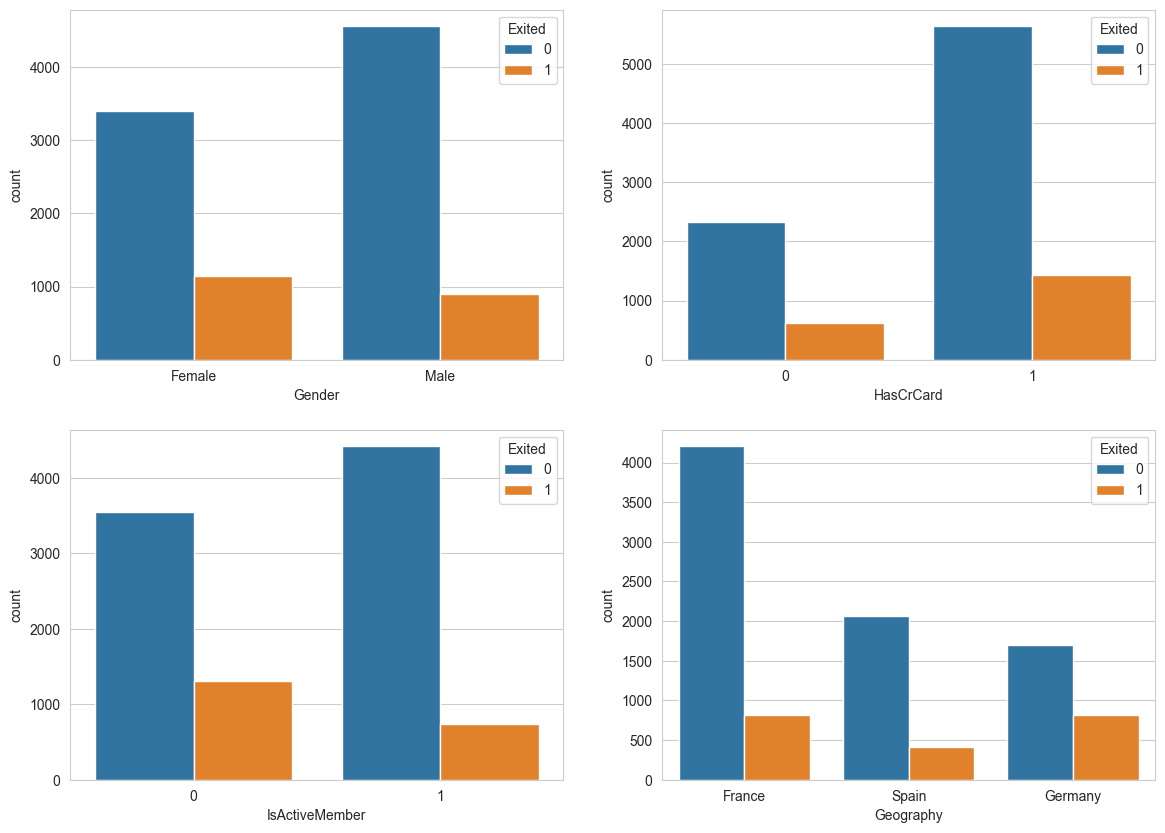

In [19]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(14, 10))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

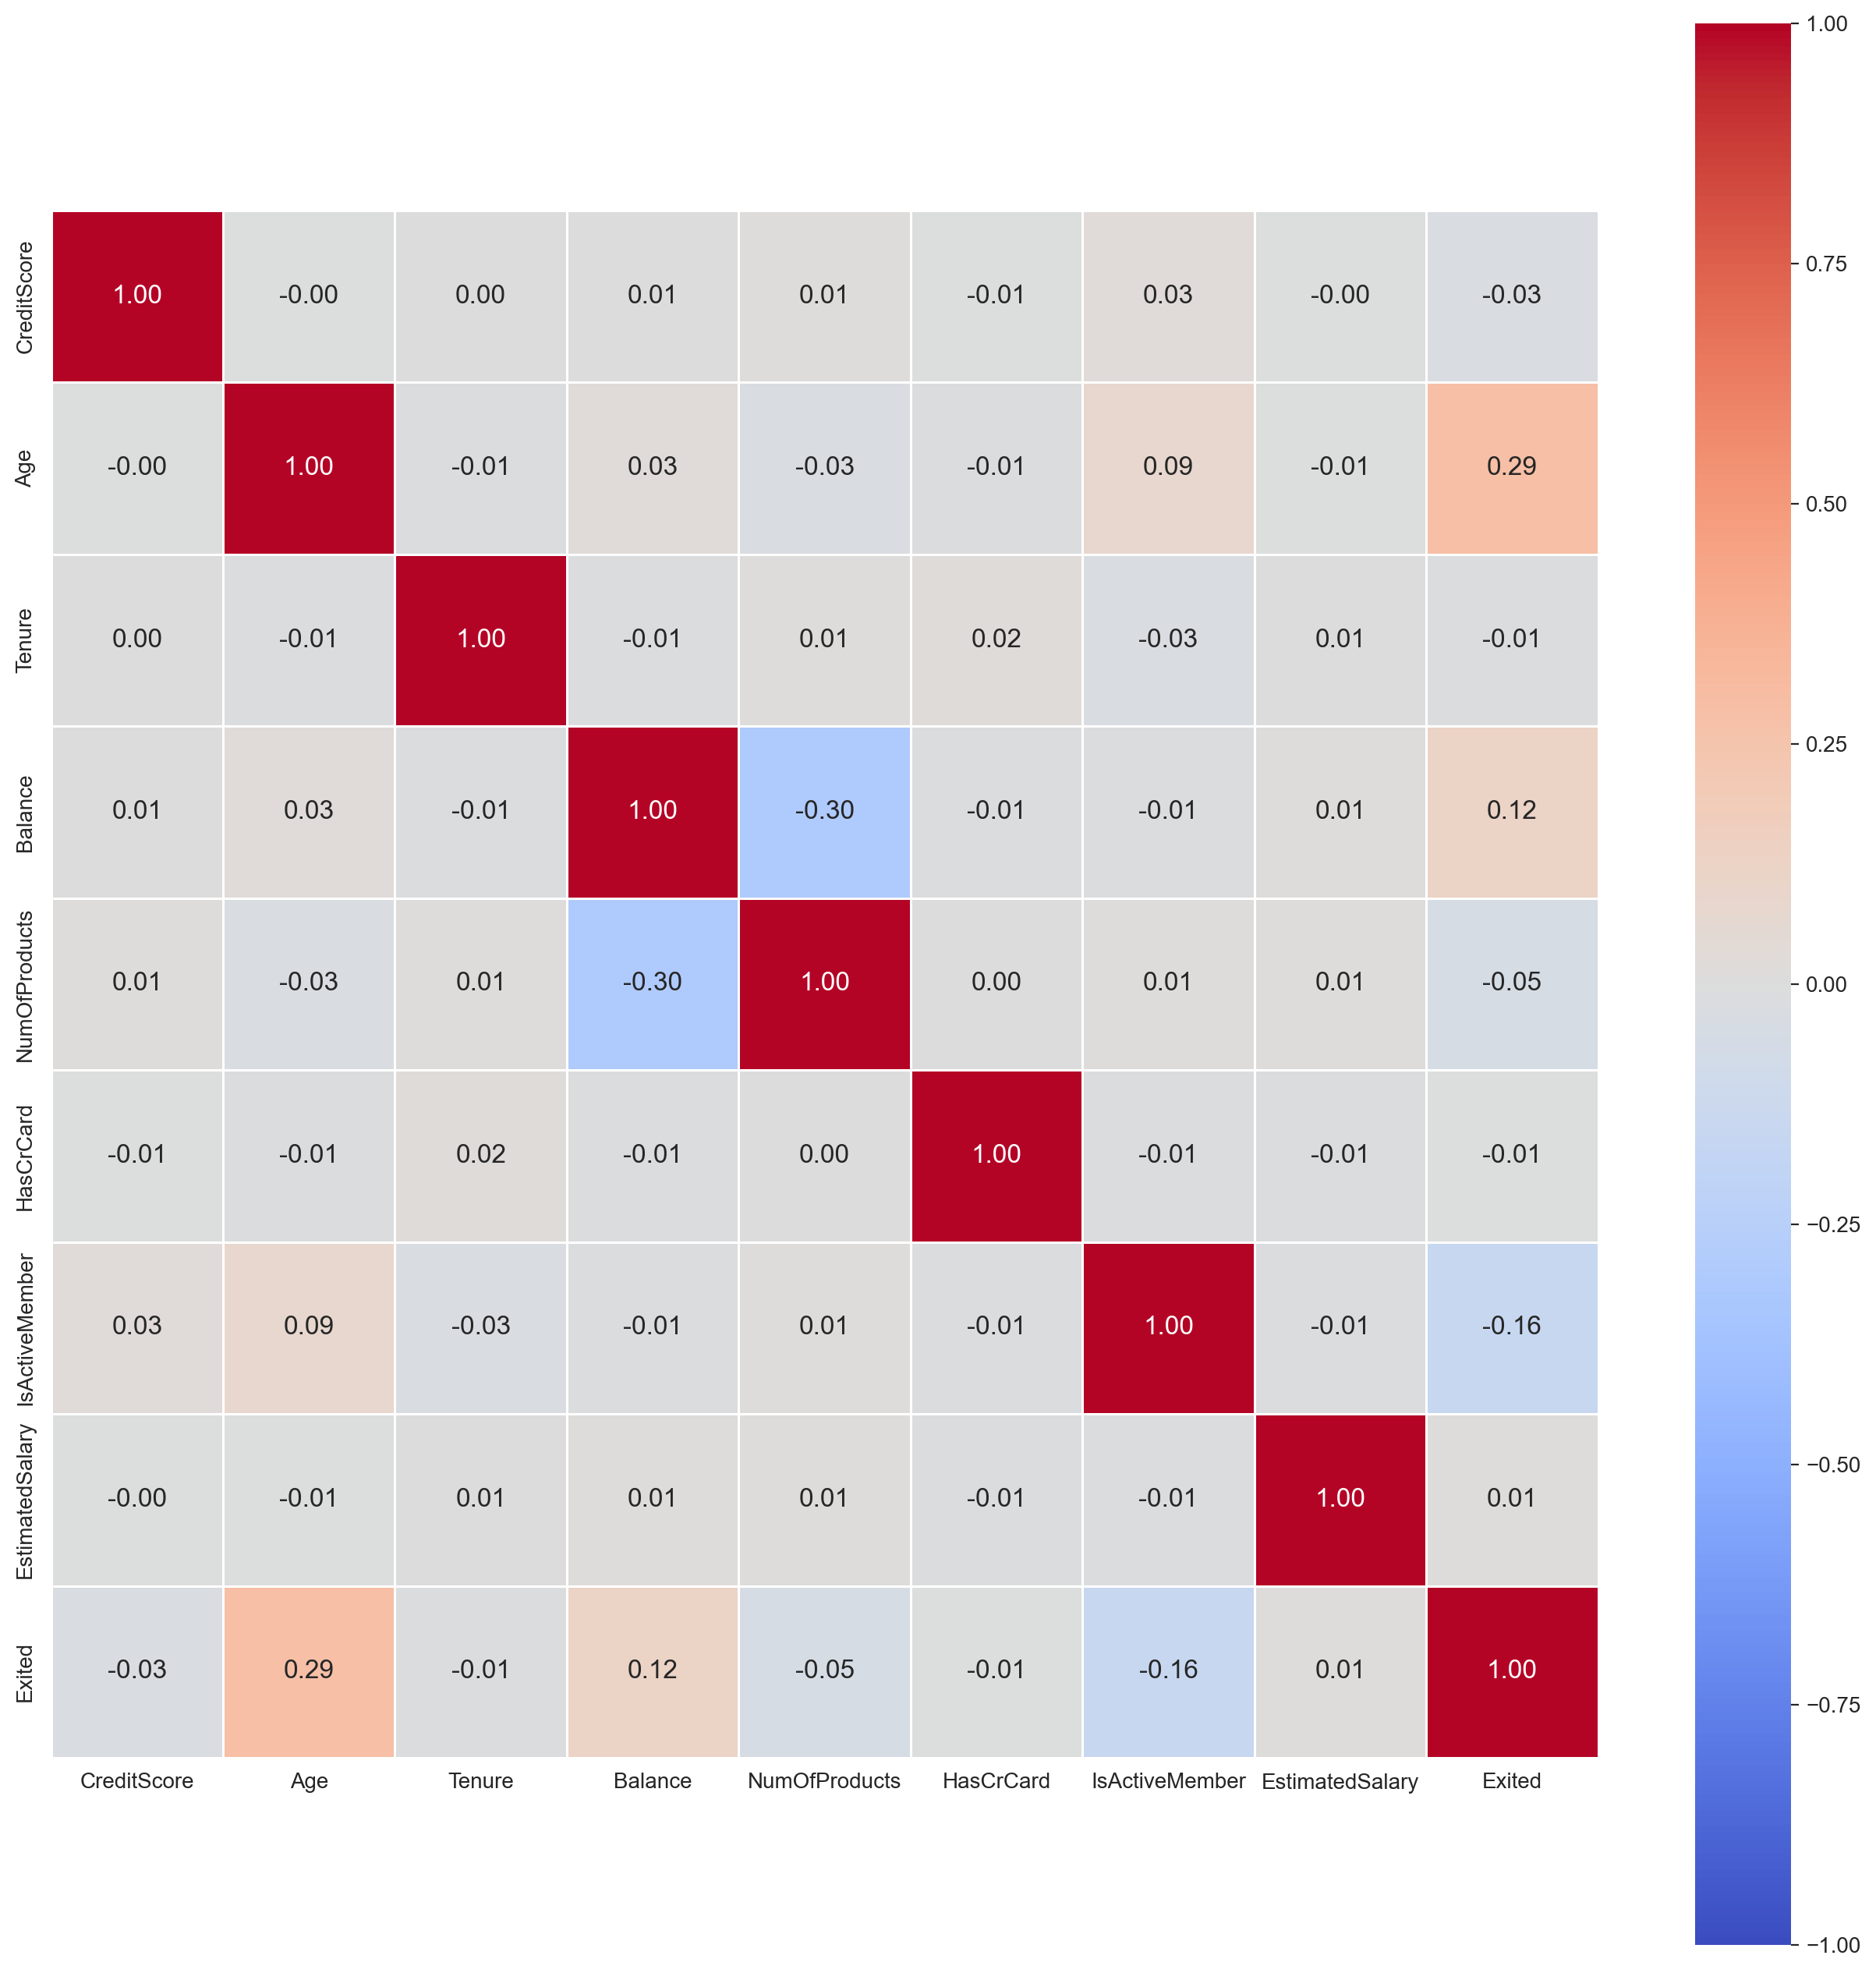

In [20]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm')


plt.show()

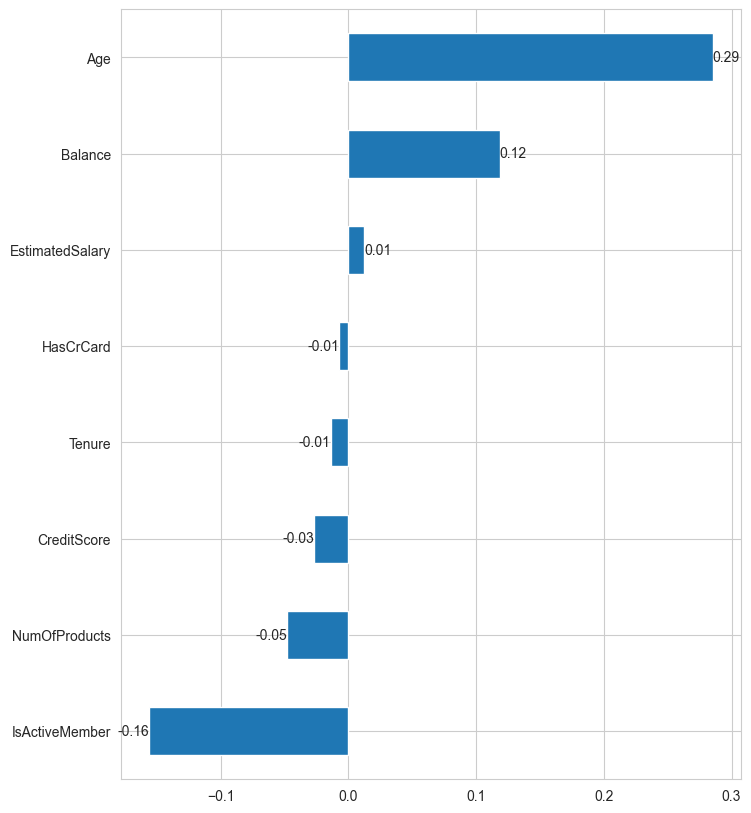

In [21]:
plt.figure(figsize=(8, 10))
ax=df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.show()

In [22]:
df = pd.get_dummies(df, drop_first=True)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
RowNumber                                                                  
1                  619   42       2      0.000              1          1   
2                  608   41       1  83807.860              1          0   
3                  502   42       8 159660.800              3          1   
4                  699   39       1      0.000              2          0   
5                  850   43       2 125510.820              1          1   

           IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
RowNumber                                                               
1                       1       101348.880       1                  0   
2                       1       112542.580       0                  0   
3                       0       113931.570       1                  0   
4                       0        93826.630       0                  0   
5                       1        79084.100       0                  0   

           Geography_Spain  Gender_Male  
RowNumber                                
1                        0            0  
2                        1            0  
3                        0            0  
4                        0            0  
5                        1            0

# Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [25]:
seed = 55
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [26]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.shape

(9000, 11)

In [28]:
X_test.shape

(1000, 11)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [45]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [46]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.5418 - recall: 0.0110 - val_loss: 0.5172 - val_recall: 0.0000e+00
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4766 - recall: 0.0000e+00 - val_loss: 0.4950 - val_recall: 0.0000e+00
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4620 - recall: 0.0000e+00 - val_loss: 0.4809 - val_recall: 0.0000e+00
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4530 - recall: 0.0000e+00 - val_loss: 0.4691 - val_recall: 0.0000e+00
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4450 - recall: 0.0000e+00 - val_loss: 0.4599 - val_recall: 0.0000e+00
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4368 - recall: 0.0000e+00 - val_loss: 0.4518 - val_recall: 0.0000e+00
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4322 - recall: 0.0000e+00 - val_loss: 

254/254 [==============================] - 0s 2ms/step - loss: 0.3291 - recall: 0.4692 - val_loss: 0.3672 - val_recall: 0.5255
Epoch 117/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3282 - recall: 0.4722 - val_loss: 0.3662 - val_recall: 0.4439
Epoch 118/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3272 - recall: 0.4808 - val_loss: 0.3669 - val_recall: 0.4694
Epoch 119/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3270 - recall: 0.4899 - val_loss: 0.3673 - val_recall: 0.4184
Epoch 120/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3282 - recall: 0.4814 - val_loss: 0.3678 - val_recall: 0.4082
Epoch 121/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3272 - recall: 0.4789 - val_loss: 0.3680 - val_recall: 0.4082
Epoch 122/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3271 - recall: 0.4759 - val_loss: 0.3674 - val_recall: 0.4847
Epoch 123/1000
254/25

Epoch 174/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4863 - val_loss: 0.3648 - val_recall: 0.4337
Epoch 175/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3228 - recall: 0.4777 - val_loss: 0.3686 - val_recall: 0.5408
Epoch 176/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3220 - recall: 0.4832 - val_loss: 0.3726 - val_recall: 0.3929
Epoch 177/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3209 - recall: 0.4881 - val_loss: 0.3734 - val_recall: 0.5357
Epoch 178/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3232 - recall: 0.4814 - val_loss: 0.3722 - val_recall: 0.4133
Epoch 179/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3209 - recall: 0.4979 - val_loss: 0.3668 - val_recall: 0.4541
Epoch 180/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3218 - recall: 0.4808 - val_loss: 0.3711 - val_recall: 0.5051
Epoch 

Epoch 232/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3198 - recall: 0.4863 - val_loss: 0.3709 - val_recall: 0.4592
Epoch 233/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3188 - recall: 0.4881 - val_loss: 0.3711 - val_recall: 0.5000
Epoch 234/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3185 - recall: 0.4930 - val_loss: 0.3713 - val_recall: 0.4286
Epoch 235/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4820 - val_loss: 0.3755 - val_recall: 0.5204
Epoch 236/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3193 - recall: 0.4942 - val_loss: 0.3734 - val_recall: 0.4592
Epoch 237/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3194 - recall: 0.4826 - val_loss: 0.3707 - val_recall: 0.4286
Epoch 238/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3184 - recall: 0.4985 - val_loss: 0.3708 - val_recall: 0.4337
Epoch 

Epoch 290/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3172 - recall: 0.4905 - val_loss: 0.3844 - val_recall: 0.5663
Epoch 291/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3164 - recall: 0.5003 - val_loss: 0.3707 - val_recall: 0.4439
Epoch 292/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3167 - recall: 0.4881 - val_loss: 0.3820 - val_recall: 0.5357
Epoch 293/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3178 - recall: 0.4942 - val_loss: 0.3700 - val_recall: 0.4439
Epoch 294/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3170 - recall: 0.4911 - val_loss: 0.3780 - val_recall: 0.5153
Epoch 295/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3186 - recall: 0.4936 - val_loss: 0.3709 - val_recall: 0.4643
Epoch 296/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3170 - recall: 0.4991 - val_loss: 0.3761 - val_recall: 0.3980
Epoch 

Epoch 348/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3159 - recall: 0.5046 - val_loss: 0.3725 - val_recall: 0.5000
Epoch 349/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3154 - recall: 0.4979 - val_loss: 0.3851 - val_recall: 0.5408
Epoch 350/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3171 - recall: 0.5021 - val_loss: 0.3775 - val_recall: 0.5102
Epoch 351/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3154 - recall: 0.5003 - val_loss: 0.3707 - val_recall: 0.4643
Epoch 352/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3147 - recall: 0.4954 - val_loss: 0.3706 - val_recall: 0.4235
Epoch 353/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3152 - recall: 0.4960 - val_loss: 0.3853 - val_recall: 0.3724
Epoch 354/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3165 - recall: 0.4936 - val_loss: 0.3770 - val_recall: 0.4337
Epoch 

Epoch 463/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3118 - recall: 0.5082 - val_loss: 0.3775 - val_recall: 0.4184
Epoch 464/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3127 - recall: 0.5015 - val_loss: 0.3776 - val_recall: 0.4490
Epoch 465/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3130 - recall: 0.5040 - val_loss: 0.3733 - val_recall: 0.4133
Epoch 466/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3136 - recall: 0.4948 - val_loss: 0.3818 - val_recall: 0.5204
Epoch 467/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3130 - recall: 0.5076 - val_loss: 0.3761 - val_recall: 0.4796
Epoch 468/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3134 - recall: 0.5040 - val_loss: 0.3750 - val_recall: 0.4643
Epoch 469/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3124 - recall: 0.5027 - val_loss: 0.3739 - val_recall: 0.4541
Epoch 

Epoch 521/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3121 - recall: 0.5052 - val_loss: 0.3937 - val_recall: 0.5153
Epoch 522/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3108 - recall: 0.5076 - val_loss: 0.3793 - val_recall: 0.4388
Epoch 523/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3131 - recall: 0.5070 - val_loss: 0.3805 - val_recall: 0.4898
Epoch 524/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3110 - recall: 0.5095 - val_loss: 0.3790 - val_recall: 0.4235
Epoch 525/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3123 - recall: 0.4948 - val_loss: 0.4005 - val_recall: 0.5663
Epoch 526/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3118 - recall: 0.5003 - val_loss: 0.3784 - val_recall: 0.4643
Epoch 527/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3112 - recall: 0.4991 - val_loss: 0.3782 - val_recall: 0.4541
Epoch 

Epoch 579/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3104 - recall: 0.5076 - val_loss: 0.3797 - val_recall: 0.4745
Epoch 580/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3099 - recall: 0.5119 - val_loss: 0.3859 - val_recall: 0.5051
Epoch 581/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3107 - recall: 0.5052 - val_loss: 0.3795 - val_recall: 0.4439
Epoch 582/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3118 - recall: 0.5034 - val_loss: 0.3816 - val_recall: 0.5051
Epoch 583/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3124 - recall: 0.4979 - val_loss: 0.3857 - val_recall: 0.5306
Epoch 584/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3086 - recall: 0.5089 - val_loss: 0.3801 - val_recall: 0.4439
Epoch 585/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3108 - recall: 0.4966 - val_loss: 0.3798 - val_recall: 0.4643
Epoch 

Epoch 637/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3112 - recall: 0.5046 - val_loss: 0.3795 - val_recall: 0.4847
Epoch 638/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3090 - recall: 0.5076 - val_loss: 0.3824 - val_recall: 0.5153
Epoch 639/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3099 - recall: 0.5076 - val_loss: 0.3818 - val_recall: 0.4949
Epoch 640/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3088 - recall: 0.5137 - val_loss: 0.3812 - val_recall: 0.4082
Epoch 641/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3111 - recall: 0.5107 - val_loss: 0.3856 - val_recall: 0.5102
Epoch 642/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3106 - recall: 0.5113 - val_loss: 0.3799 - val_recall: 0.4694
Epoch 643/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3096 - recall: 0.5131 - val_loss: 0.3788 - val_recall: 0.4745
Epoch 

Epoch 695/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3085 - recall: 0.5137 - val_loss: 0.3836 - val_recall: 0.4541
Epoch 696/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3097 - recall: 0.5162 - val_loss: 0.3799 - val_recall: 0.4337
Epoch 697/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3089 - recall: 0.5027 - val_loss: 0.3873 - val_recall: 0.5204
Epoch 698/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3101 - recall: 0.5107 - val_loss: 0.3802 - val_recall: 0.4388
Epoch 699/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3094 - recall: 0.5119 - val_loss: 0.3825 - val_recall: 0.4745
Epoch 700/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3090 - recall: 0.5174 - val_loss: 0.3808 - val_recall: 0.4490
Epoch 701/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3095 - recall: 0.5125 - val_loss: 0.3780 - val_recall: 0.4643
Epoch 

Epoch 753/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3078 - recall: 0.5095 - val_loss: 0.3790 - val_recall: 0.4694
Epoch 754/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3095 - recall: 0.5015 - val_loss: 0.3792 - val_recall: 0.4796
Epoch 755/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3100 - recall: 0.5021 - val_loss: 0.3774 - val_recall: 0.4898
Epoch 756/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3076 - recall: 0.5162 - val_loss: 0.3841 - val_recall: 0.5000
Epoch 757/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3072 - recall: 0.5089 - val_loss: 0.3811 - val_recall: 0.4898
Epoch 758/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3073 - recall: 0.5144 - val_loss: 0.3798 - val_recall: 0.5051
Epoch 759/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3073 - recall: 0.5089 - val_loss: 0.3775 - val_recall: 0.4898
Epoch 

Epoch 811/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3067 - recall: 0.5137 - val_loss: 0.3815 - val_recall: 0.4184
Epoch 812/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3099 - recall: 0.5040 - val_loss: 0.3766 - val_recall: 0.4796
Epoch 813/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3088 - recall: 0.5089 - val_loss: 0.3854 - val_recall: 0.4082
Epoch 814/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3081 - recall: 0.5082 - val_loss: 0.3784 - val_recall: 0.4490
Epoch 815/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3129 - recall: 0.4881 - val_loss: 0.3834 - val_recall: 0.5306
Epoch 816/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3059 - recall: 0.5034 - val_loss: 0.3760 - val_recall: 0.5000
Epoch 817/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3062 - recall: 0.5131 - val_loss: 0.3941 - val_recall: 0.5561
Epoch 

Epoch 869/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3079 - recall: 0.5107 - val_loss: 0.3777 - val_recall: 0.4847
Epoch 870/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3068 - recall: 0.5107 - val_loss: 0.3931 - val_recall: 0.5510
Epoch 871/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3057 - recall: 0.5107 - val_loss: 0.3818 - val_recall: 0.5051
Epoch 872/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3064 - recall: 0.5199 - val_loss: 0.3784 - val_recall: 0.4541
Epoch 873/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3068 - recall: 0.5052 - val_loss: 0.3783 - val_recall: 0.4184
Epoch 874/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3059 - recall: 0.5168 - val_loss: 0.3840 - val_recall: 0.5306
Epoch 875/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3077 - recall: 0.5101 - val_loss: 0.3803 - val_recall: 0.5102
Epoch 

Epoch 927/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3062 - recall: 0.5119 - val_loss: 0.3967 - val_recall: 0.5663
Epoch 928/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3057 - recall: 0.5205 - val_loss: 0.3803 - val_recall: 0.4745
Epoch 929/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3069 - recall: 0.5052 - val_loss: 0.3849 - val_recall: 0.5255
Epoch 930/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3063 - recall: 0.5162 - val_loss: 0.3822 - val_recall: 0.4694
Epoch 931/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3070 - recall: 0.5034 - val_loss: 0.3917 - val_recall: 0.5408
Epoch 932/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3051 - recall: 0.5150 - val_loss: 0.3813 - val_recall: 0.4898
Epoch 933/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3067 - recall: 0.5150 - val_loss: 0.3750 - val_recall: 0.4745
Epoch 

Epoch 985/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3064 - recall: 0.5095 - val_loss: 0.3808 - val_recall: 0.4643
Epoch 986/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3059 - recall: 0.5095 - val_loss: 0.3813 - val_recall: 0.4796
Epoch 987/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3056 - recall: 0.5046 - val_loss: 0.3899 - val_recall: 0.5204
Epoch 988/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3063 - recall: 0.5199 - val_loss: 0.3833 - val_recall: 0.5153
Epoch 989/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3059 - recall: 0.5199 - val_loss: 0.3857 - val_recall: 0.5102
Epoch 990/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3058 - recall: 0.5113 - val_loss: 0.3783 - val_recall: 0.4541
Epoch 991/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3060 - recall: 0.5089 - val_loss: 0.3844 - val_recall: 0.4337
Epoch 

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.542   0.011     0.517       0.000
1 0.477   0.000     0.495       0.000
2 0.462   0.000     0.481       0.000
3 0.453   0.000     0.469       0.000
4 0.445   0.000     0.460       0.000

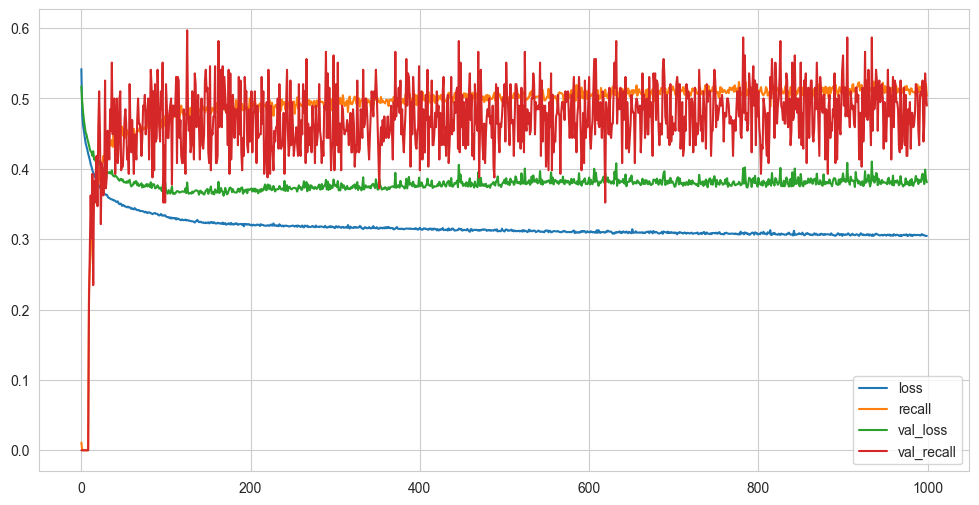

In [48]:
loss_df.plot()
plt.show()

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[761  35]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 1ms/step


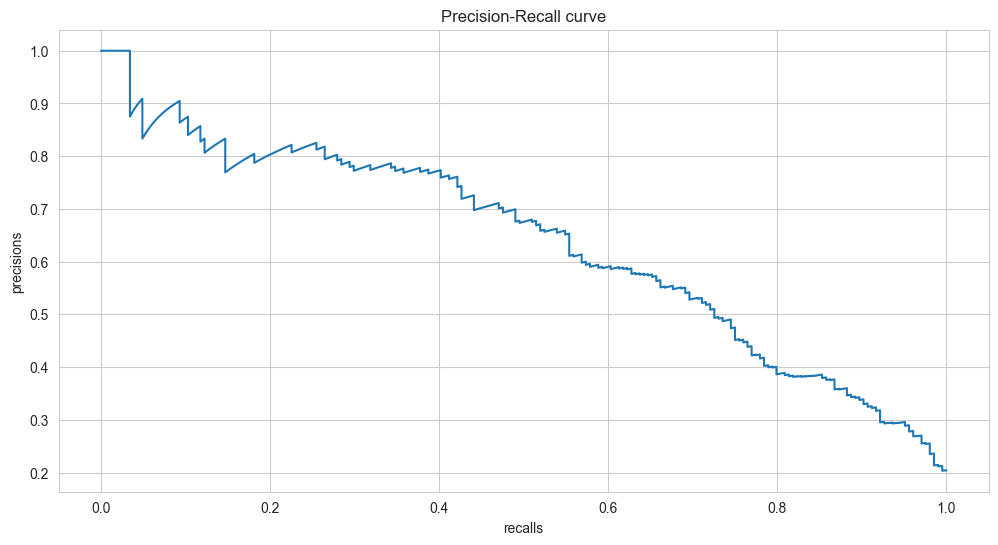

In [53]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# Early stopping

In [58]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam", 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [51]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=15)

In [60]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
64/64 [==============================] - 1s 4ms/step - loss: 0.6972 - recall: 0.4087 - val_loss: 0.6753 - val_recall: 0.0000e+00
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6575 - recall: 0.0000e+00 - val_loss: 0.6343 - val_recall: 0.0000e+00
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5864 - recall: 0.0000e+00 - val_loss: 0.5414 - val_recall: 0.0000e+00
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5020 - recall: 0.0000e+00 - val_loss: 0.5101 - val_recall: 0.0000e+00
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4861 - recall: 0.0000e+00 - val_loss: 0.5038 - val_recall: 0.0000e+00
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4794 - recall: 0.0000e+00 - val_loss: 0.4985 - val_recall: 0.0000e+00
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4731 - recall: 0.0000e+00 - val_loss: 0.4924 - val_r

Epoch 59/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3484 - recall: 0.4099 - val_loss: 0.3743 - val_recall: 0.4286
Epoch 60/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3476 - recall: 0.4233 - val_loss: 0.3729 - val_recall: 0.4337
Epoch 61/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3478 - recall: 0.4209 - val_loss: 0.3718 - val_recall: 0.4286
Epoch 62/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3471 - recall: 0.4160 - val_loss: 0.3712 - val_recall: 0.4592
Epoch 63/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3471 - recall: 0.4307 - val_loss: 0.3723 - val_recall: 0.4133
Epoch 64/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3464 - recall: 0.4246 - val_loss: 0.3716 - val_recall: 0.4235
Epoch 65/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3458 - recall: 0.4386 - val_loss: 0.3719 - val_recall: 0.4133
Epoch 66/1000
64/64 [======

Epoch 118/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3328 - recall: 0.4508 - val_loss: 0.3653 - val_recall: 0.5153
Epoch 119/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3331 - recall: 0.4637 - val_loss: 0.3645 - val_recall: 0.4643
Epoch 120/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3328 - recall: 0.4588 - val_loss: 0.3662 - val_recall: 0.4898
Epoch 121/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3328 - recall: 0.4673 - val_loss: 0.3677 - val_recall: 0.4541
Epoch 121: early stopping


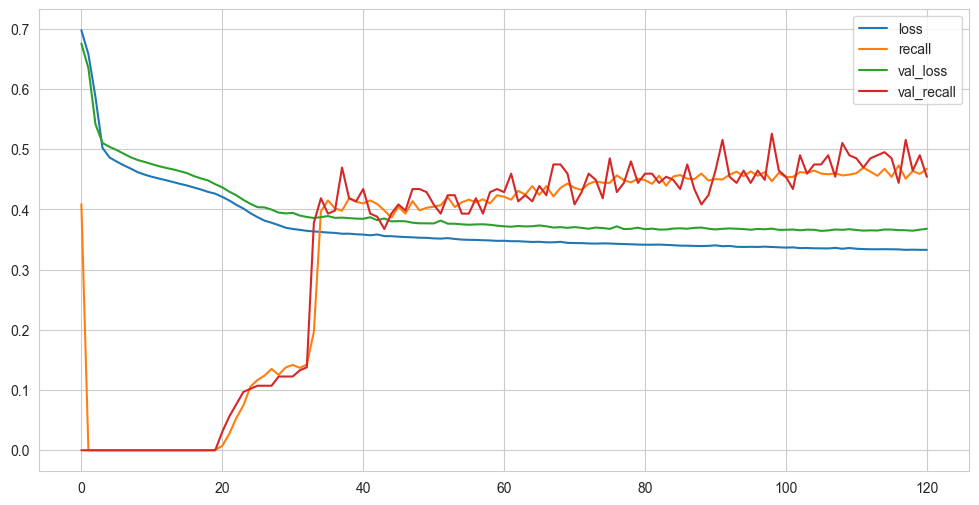

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[770  26]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.75      0.39      0.52       204

    accuracy                           0.85      1000
   macro avg       0.81      0.68      0.71      1000
weighted avg       0.84      0.85      0.83      1000



# Learning rate

In [45]:
from tensorflow.keras.optimizers import Adam

In [69]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [70]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [71]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4791 - recall: 0.0012 - val_loss: 0.4744 - val_recall: 0.0000e+00
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4260 - recall: 0.1594 - val_loss: 0.4139 - val_recall: 0.2194
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3848 - recall: 0.3561 - val_loss: 0.3804 - val_recall: 0.4592
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3628 - recall: 0.3855 - val_loss: 0.3694 - val_recall: 0.3827
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3556 - recall: 0.3995 - val_loss: 0.3689 - val_recall: 0.3724
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3521 - recall: 0.4105 - val_loss: 0.3802 - val_recall: 0.3776
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3475 - recall: 0.4215 - val_loss: 0.3880 - val_recall: 0.3265
Epoch 8/1000
254

In [72]:
loss_df = pd.DataFrame(model.history.history)


<Axes: >

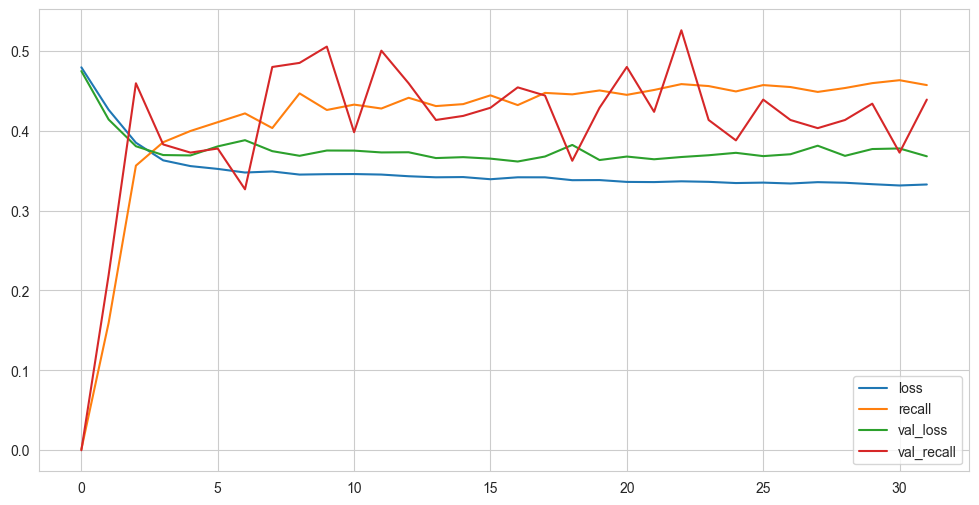

In [73]:
loss_df.plot()

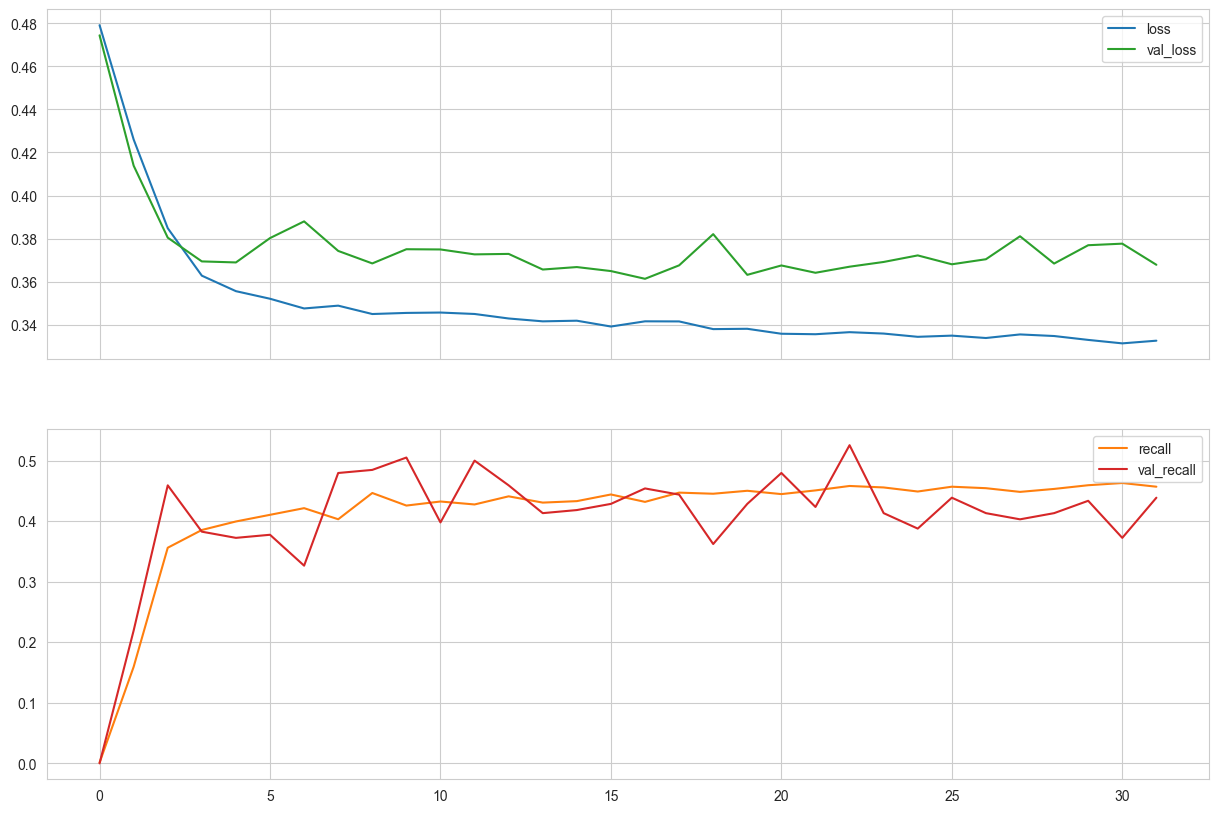

In [76]:
loss_df.plot(subplots=[['loss','val_loss'],['recall','val_recall']],layout=(2,1),figsize=(15,10));

In [77]:
 model.evaluate(X_test, y_test, verbose=0)

[0.35433295369148254, 0.3921568691730499]

In [78]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[771  25]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.76      0.39      0.52       204

    accuracy                           0.85      1000
   macro avg       0.81      0.68      0.71      1000
weighted avg       0.84      0.85      0.83      1000



# Dropout

In [87]:
from tensorflow.keras.layers import Dropout

In [88]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [89]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6136 - recall: 0.0501 - val_loss: 0.5310 - val_recall: 0.0000e+00
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5564 - recall: 0.0031 - val_loss: 0.5214 - val_recall: 0.0000e+00
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5357 - recall: 6.1087e-04 - val_loss: 0.5196 - val_recall: 0.0000e+00
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5217 - recall: 0.0018 - val_loss: 0.5127 - val_recall: 0.0000e+00
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5107 - recall: 0.0037 - val_loss: 0.5083 - val_recall: 0.0000e+00
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5051 - recall: 0.0049 - val_loss: 0.5035 - val_recall: 0.0000e+00
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5037 - recall: 0.0073 - val_loss: 0.5043 - val_recall:

254/254 [==============================] - 0s 1ms/step - loss: 0.4343 - recall: 0.1759 - val_loss: 0.3937 - val_recall: 0.2041
Epoch 117/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4287 - recall: 0.1912 - val_loss: 0.3919 - val_recall: 0.2500
Epoch 118/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4334 - recall: 0.1710 - val_loss: 0.3934 - val_recall: 0.2449
Epoch 119/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4283 - recall: 0.1863 - val_loss: 0.3944 - val_recall: 0.2245
Epoch 120/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4373 - recall: 0.1643 - val_loss: 0.3928 - val_recall: 0.2347
Epoch 121/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4283 - recall: 0.1839 - val_loss: 0.3965 - val_recall: 0.1990
Epoch 122/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4324 - recall: 0.1686 - val_loss: 0.3902 - val_recall: 0.2551
Epoch 123/1000
254/25

Epoch 174/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4296 - recall: 0.1839 - val_loss: 0.3928 - val_recall: 0.2449
Epoch 175/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4382 - recall: 0.1833 - val_loss: 0.3984 - val_recall: 0.2041
Epoch 176/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4356 - recall: 0.1680 - val_loss: 0.3927 - val_recall: 0.2449
Epoch 177/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4355 - recall: 0.1863 - val_loss: 0.3946 - val_recall: 0.2245
Epoch 178/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4335 - recall: 0.1833 - val_loss: 0.3938 - val_recall: 0.2347
Epoch 179/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4338 - recall: 0.1747 - val_loss: 0.3930 - val_recall: 0.2194
Epoch 180/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4322 - recall: 0.1790 - val_loss: 0.3928 - val_recall: 0.2296
Epoch 

Epoch 289/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4222 - recall: 0.2028 - val_loss: 0.3908 - val_recall: 0.2245
Epoch 290/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4208 - recall: 0.2126 - val_loss: 0.3890 - val_recall: 0.2347
Epoch 291/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4219 - recall: 0.1943 - val_loss: 0.3796 - val_recall: 0.2959
Epoch 292/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4242 - recall: 0.2010 - val_loss: 0.3879 - val_recall: 0.2551
Epoch 293/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4291 - recall: 0.1949 - val_loss: 0.3883 - val_recall: 0.2398
Epoch 294/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4332 - recall: 0.1643 - val_loss: 0.3939 - val_recall: 0.1939
Epoch 295/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4258 - recall: 0.1918 - val_loss: 0.3857 - val_recall: 0.2347
Epoch 

Epoch 347/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4299 - recall: 0.1985 - val_loss: 0.3937 - val_recall: 0.2194
Epoch 348/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4293 - recall: 0.1973 - val_loss: 0.3915 - val_recall: 0.2143
Epoch 349/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4341 - recall: 0.1778 - val_loss: 0.3896 - val_recall: 0.2194
Epoch 350/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4243 - recall: 0.1973 - val_loss: 0.3891 - val_recall: 0.2347
Epoch 351/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4285 - recall: 0.1857 - val_loss: 0.3866 - val_recall: 0.2602
Epoch 352/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4232 - recall: 0.1949 - val_loss: 0.3851 - val_recall: 0.2602
Epoch 353/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4263 - recall: 0.2034 - val_loss: 0.3861 - val_recall: 0.2704
Epoch 

Epoch 462/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4287 - recall: 0.1912 - val_loss: 0.3868 - val_recall: 0.2398
Epoch 463/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4265 - recall: 0.2028 - val_loss: 0.3882 - val_recall: 0.2347
Epoch 464/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4257 - recall: 0.1985 - val_loss: 0.3828 - val_recall: 0.2857
Epoch 465/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4332 - recall: 0.1833 - val_loss: 0.3833 - val_recall: 0.2449
Epoch 466/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4298 - recall: 0.1839 - val_loss: 0.3853 - val_recall: 0.2398
Epoch 467/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4274 - recall: 0.1906 - val_loss: 0.3898 - val_recall: 0.1990
Epoch 468/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4232 - recall: 0.1930 - val_loss: 0.3816 - val_recall: 0.2551
Epoch 

Epoch 520/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4255 - recall: 0.2022 - val_loss: 0.3878 - val_recall: 0.2449
Epoch 521/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4286 - recall: 0.1827 - val_loss: 0.3852 - val_recall: 0.2551
Epoch 522/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4176 - recall: 0.2187 - val_loss: 0.3832 - val_recall: 0.2755
Epoch 523/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4253 - recall: 0.2114 - val_loss: 0.3856 - val_recall: 0.2194
Epoch 524/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4271 - recall: 0.1753 - val_loss: 0.3873 - val_recall: 0.2398
Epoch 525/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4271 - recall: 0.1851 - val_loss: 0.3813 - val_recall: 0.2857
Epoch 526/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4254 - recall: 0.2028 - val_loss: 0.3843 - val_recall: 0.2449
Epoch 

Epoch 578/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4317 - recall: 0.1875 - val_loss: 0.3893 - val_recall: 0.2347
Epoch 579/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4197 - recall: 0.2016 - val_loss: 0.3854 - val_recall: 0.2755
Epoch 580/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4327 - recall: 0.1790 - val_loss: 0.3887 - val_recall: 0.2347
Epoch 581/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4192 - recall: 0.2083 - val_loss: 0.3845 - val_recall: 0.2653
Epoch 582/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4217 - recall: 0.2199 - val_loss: 0.3857 - val_recall: 0.2602
Epoch 583/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4250 - recall: 0.1918 - val_loss: 0.3832 - val_recall: 0.2653
Epoch 584/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4253 - recall: 0.1985 - val_loss: 0.3870 - val_recall: 0.2653
Epoch 

Epoch 636/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4293 - recall: 0.1851 - val_loss: 0.3896 - val_recall: 0.2347
Epoch 637/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4234 - recall: 0.2046 - val_loss: 0.3856 - val_recall: 0.2551
Epoch 638/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4258 - recall: 0.2150 - val_loss: 0.3883 - val_recall: 0.2347
Epoch 639/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4253 - recall: 0.1961 - val_loss: 0.3839 - val_recall: 0.2602
Epoch 640/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4261 - recall: 0.1949 - val_loss: 0.3886 - val_recall: 0.2500
Epoch 641/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4326 - recall: 0.1955 - val_loss: 0.3894 - val_recall: 0.2500
Epoch 642/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4236 - recall: 0.1894 - val_loss: 0.3866 - val_recall: 0.2347
Epoch 

Epoch 694/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4267 - recall: 0.2071 - val_loss: 0.3877 - val_recall: 0.2398
Epoch 695/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4230 - recall: 0.1912 - val_loss: 0.3850 - val_recall: 0.2398
Epoch 696/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4262 - recall: 0.1955 - val_loss: 0.3827 - val_recall: 0.2551
Epoch 697/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4229 - recall: 0.2291 - val_loss: 0.3850 - val_recall: 0.2551
Epoch 698/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4241 - recall: 0.2071 - val_loss: 0.3878 - val_recall: 0.2347
Epoch 699/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4264 - recall: 0.1985 - val_loss: 0.3834 - val_recall: 0.2551
Epoch 700/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4357 - recall: 0.1778 - val_loss: 0.3879 - val_recall: 0.2092
Epoch 

Epoch 809/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4204 - recall: 0.2016 - val_loss: 0.3830 - val_recall: 0.2347
Epoch 810/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4200 - recall: 0.2101 - val_loss: 0.3817 - val_recall: 0.2449
Epoch 811/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4306 - recall: 0.1808 - val_loss: 0.3839 - val_recall: 0.2398
Epoch 812/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4305 - recall: 0.1991 - val_loss: 0.3853 - val_recall: 0.2500
Epoch 813/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4325 - recall: 0.1930 - val_loss: 0.3899 - val_recall: 0.2296
Epoch 814/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4260 - recall: 0.1998 - val_loss: 0.3839 - val_recall: 0.2398
Epoch 815/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4245 - recall: 0.2089 - val_loss: 0.3853 - val_recall: 0.2398
Epoch 

Epoch 867/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4193 - recall: 0.2199 - val_loss: 0.3816 - val_recall: 0.2755
Epoch 868/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4280 - recall: 0.2022 - val_loss: 0.3858 - val_recall: 0.2296
Epoch 869/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4224 - recall: 0.2108 - val_loss: 0.3859 - val_recall: 0.2500
Epoch 870/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4236 - recall: 0.1949 - val_loss: 0.3874 - val_recall: 0.2296
Epoch 871/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4204 - recall: 0.2065 - val_loss: 0.3813 - val_recall: 0.2551
Epoch 872/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4229 - recall: 0.1875 - val_loss: 0.3788 - val_recall: 0.3010
Epoch 873/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4287 - recall: 0.1967 - val_loss: 0.3821 - val_recall: 0.2704
Epoch 

Epoch 925/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4274 - recall: 0.2004 - val_loss: 0.3881 - val_recall: 0.2092
Epoch 926/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4265 - recall: 0.1912 - val_loss: 0.3847 - val_recall: 0.2551
Epoch 927/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4265 - recall: 0.1936 - val_loss: 0.3855 - val_recall: 0.2347
Epoch 928/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4292 - recall: 0.1967 - val_loss: 0.3857 - val_recall: 0.2653
Epoch 929/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4255 - recall: 0.1973 - val_loss: 0.3825 - val_recall: 0.2398
Epoch 930/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4243 - recall: 0.1998 - val_loss: 0.3843 - val_recall: 0.2500
Epoch 931/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4268 - recall: 0.1967 - val_loss: 0.3876 - val_recall: 0.2194
Epoch 

<Axes: >

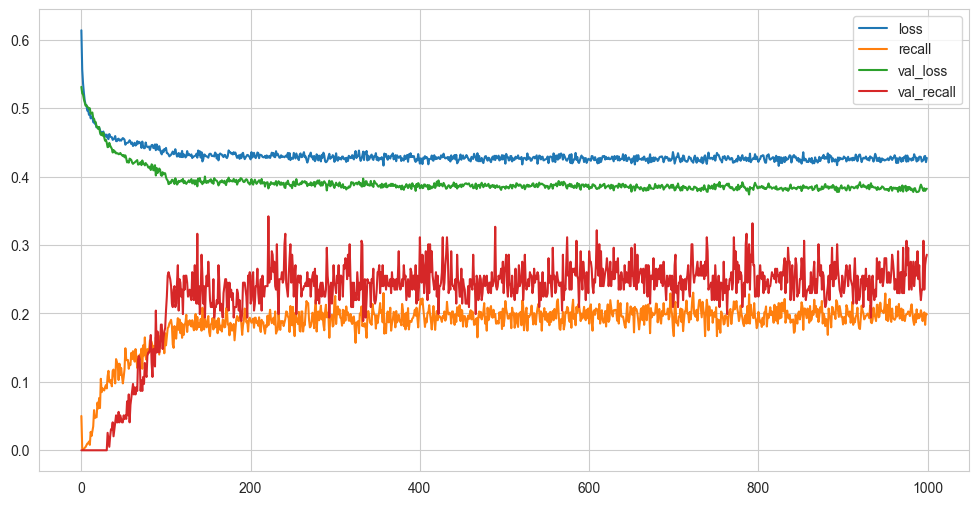

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [91]:
model.evaluate(X_test, y_test, verbose=0)

[0.3775561451911926, 0.2598039209842682]

In [92]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[790   6]
 [151  53]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       796
           1       0.90      0.26      0.40       204

    accuracy                           0.84      1000
   macro avg       0.87      0.63      0.66      1000
weighted avg       0.85      0.84      0.81      1000



# Hyperparameter search with Optuna

In [93]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [94]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [95]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [96]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-11 19:40:40,943] A new study created in memory with name: no-name-f441eccb-c38b-41e0-bc52-942ae8d86cc7


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-11-11 19:40:45,164] Trial 0 finished with value: 0.37745097279548645 and parameters: {'n_units1': 116, 'n_units2': 47, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0812135942057601, 'w0': 0.2671564251748521, 'w1': 0.35893471246065306}. Best is trial 0 with value: 0.37745097279548645.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2023-11-11 19:40:52,146] Trial 1 finished with value: 0.23529411852359772 and parameters: {'n_units1': 67, 'n_units2': 124, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.003248537864444442, 'w0': 0.060151179841540725, 'w1': 0.014282466229795331}. Best is trial 0 with value: 0.37745097279548645.
[I 2023-11-11 19:41:12,295] Trial 2 finished with value: 0.343137264251709 and parameters: {'n_units1': 126, 'n_units2': 123, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 2.8286626784148902e-05, 'w0': 0.09610154546696342, 'w1': 0.11154870189736786}. Best is trial 0 with value: 0.37745097279548645.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-11-11 19:41:16,862] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 31, 'n_units2': 53, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.02588359520951094, 'w0': 0.5488706200933302, 'w1': 0.029658760484867392}. Best is trial 0 with value: 0.37745097279548645.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-11-11 19:41:20,730] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 117, 'n_units2': 46, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 3.0096486308722575e-05, 'w0': 3.8328304339154395, 'w1': 0.014380498482843979}. Best is trial 0 with value: 0.37745097279548645.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-11-11 19:41:25,835] Trial 5 finished with value: 0.6519607901573181 and parameters: {'n_units1': 76, 'n_units2': 115, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.019208900945338517, 'w0': 0.17677471754945656, 'w1': 0.9112609426100771}. Best is trial 5 with value: 0.6519607901573181.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-11-11 19:41:31,514] Trial 6 finished with value: 0.7892156839370728 and parameters: {'n_units1': 63, 'n_units2': 52, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06159604837873512, 'w0': 0.16245836969859512, 'w1': 2.1376147286114207}. Best is trial 6 with value: 0.7892156839370728.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-11-11 19:41:37,687] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 14, 'n_units2': 123, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.3306479101092784e-05, 'w0': 3.9821355222360135, 'w1': 0.017453686598370106}. Best is trial 6 with value: 0.7892156839370728.
[I 2023-11-11 19:41:57,617] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 91, 'n_units2': 126, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00010780721521052768, 'w0': 0.1915818657313975, 'w1': 0.034479906647169066}. Best is trial 6 with value: 0.7892156839370728.
[I 2023-11-11 19:42:15,545] Trial 9 finished with value: 0.45098039507865906 and parameters: {'n_units1': 48, 'n_units2': 18, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0009388375371364768, 'w0': 3.2538476998214576, 'w1': 2.4540849378037826}. Best is trial 6 with value: 0.7892156839370728.


{'n_units1': 63,
 'n_units2': 52,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.06159604837873512,
 'w0': 0.16245836969859512,
 'w1': 2.1376147286114207}

In [97]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
127/127 [==============================] - 1s 3ms/step - loss: 0.5095 - recall: 0.1252 - val_loss: 0.4834 - val_recall: 0.0051
Epoch 2/100
127/127 [==============================] - 0s 2ms/step - loss: 0.4298 - recall: 0.2211 - val_loss: 0.4232 - val_recall: 0.3112
Epoch 3/100
127/127 [==============================] - 0s 2ms/step - loss: 0.4020 - recall: 0.3122 - val_loss: 0.5961 - val_recall: 0.7398
Epoch 4/100
127/127 [==============================] - 0s 2ms/step - loss: 0.3926 - recall: 0.3225 - val_loss: 0.4371 - val_recall: 0.2041
Epoch 5/100
127/127 [==============================] - 0s 2ms/step - loss: 0.3843 - recall: 0.3482 - val_loss: 0.3925 - val_recall: 0.4133
Epoch 6/100
127/127 [==============================] - 0s 2ms/step - loss: 0.3801 - recall: 0.3574 - val_loss: 0.3794 - val_recall: 0.4337
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 0.3775 - recall: 0.3812 - val_loss: 0.4203 - val_recall: 0.3112
Epoch 8/100
127/127 [======

In [98]:
history = model.history.history

In [99]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[770  26]
 [121  83]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.76      0.41      0.53       204

    accuracy                           0.85      1000
   macro avg       0.81      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



In [100]:
model.save('model_optuna_without_classweight.h5')

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 1ms/step


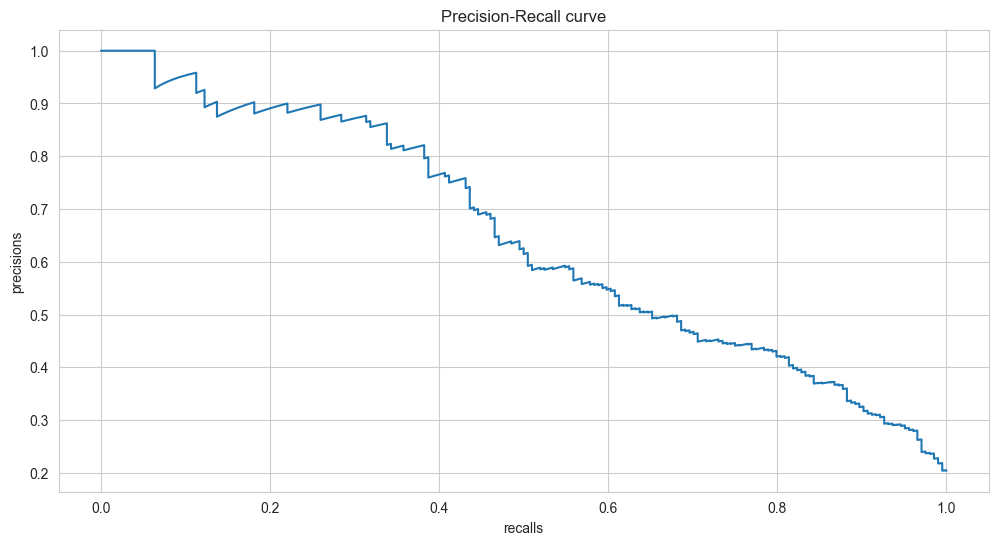

In [101]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN without class weight')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [102]:
average_precision_score(y_test, y_pred_proba)

0.6474603024716503

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [106]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [107]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [108]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
64/64 [==============================] - 1s 4ms/step - loss: 0.6856 - recall: 0.1246 - val_loss: 0.6252 - val_recall: 0.3316
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6637 - recall: 0.4197 - val_loss: 0.6078 - val_recall: 0.5204
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6533 - recall: 0.5498 - val_loss: 0.6142 - val_recall: 0.6582
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6459 - recall: 0.6200 - val_loss: 0.5877 - val_recall: 0.5867
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6389 - recall: 0.6151 - val_loss: 0.5931 - val_recall: 0.6429
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6320 - recall: 0.6573 - val_loss: 0.5725 - val_recall: 0.6020
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6255 - recall: 0.6561 - val_loss: 0.5732 - val_recall: 0.6429
Epoch 8/1000
64/64 [==============

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

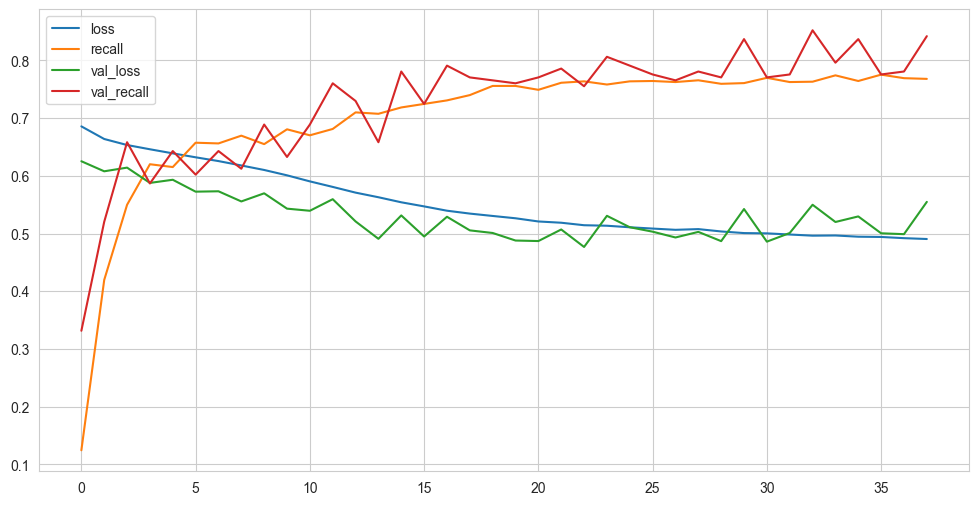

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [113]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[640 156]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.86       796
           1       0.48      0.71      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.83      0.78      0.80      1000



32/32 [==============================] - 0s 1ms/step


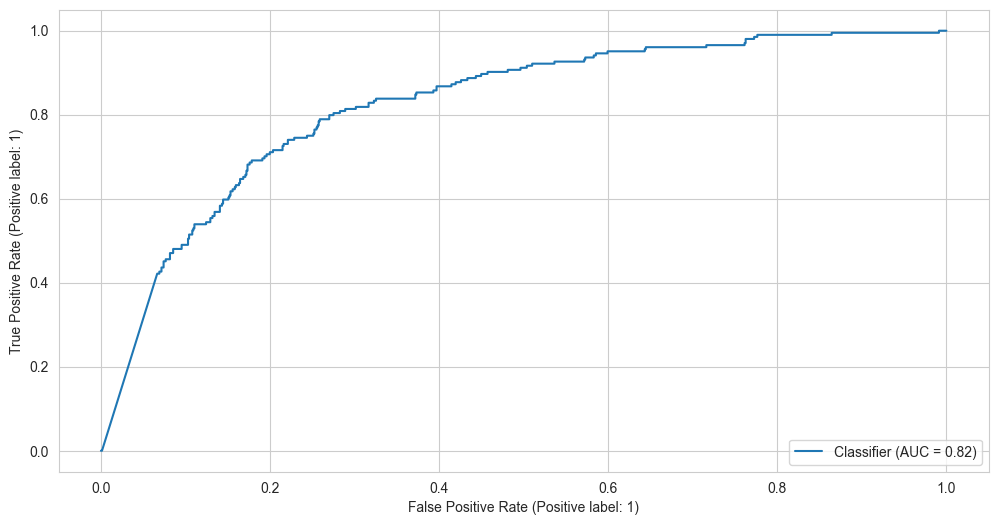

In [116]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

32/32 [==============================] - 0s 2ms/step


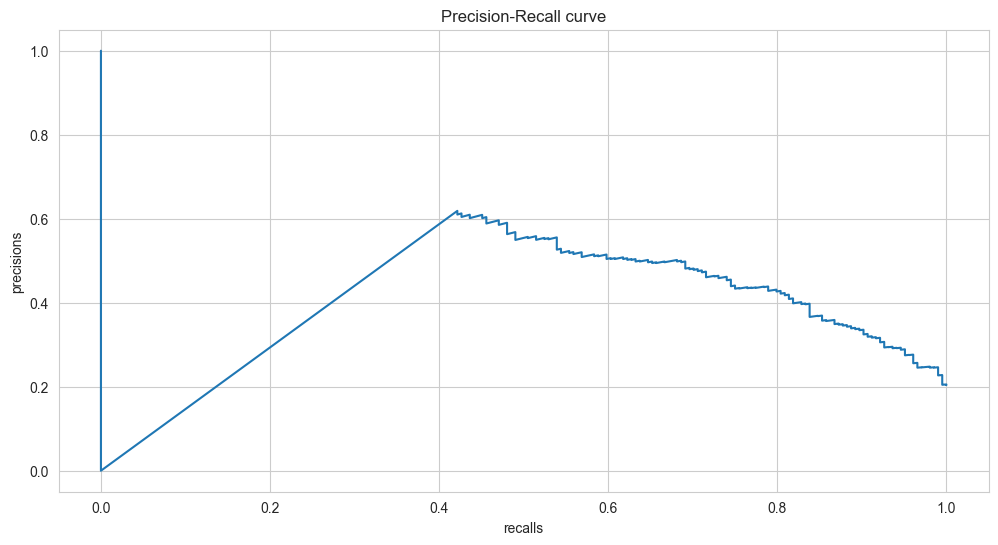

In [118]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [119]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [120]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [121]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop], class_weight=class_weights
)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6420 - recall: 0.6891 - val_loss: 0.6127 - val_recall: 0.5153
Epoch 2/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5859 - recall: 0.6793 - val_loss: 0.5842 - val_recall: 0.7449
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5383 - recall: 0.7104 - val_loss: 0.5570 - val_recall: 0.7704
Epoch 4/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5125 - recall: 0.7190 - val_loss: 0.4885 - val_recall: 0.7143
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4986 - recall: 0.7233 - val_loss: 0.4367 - val_recall: 0.6378
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4887 - recall: 0.7269 - val_loss: 0.4774 - val_recall: 0.7194
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4825 - recall: 0.7355 - val_loss: 0.4598 - val_recall: 0.6888
Epoch 8/1000
254/254

<Axes: >

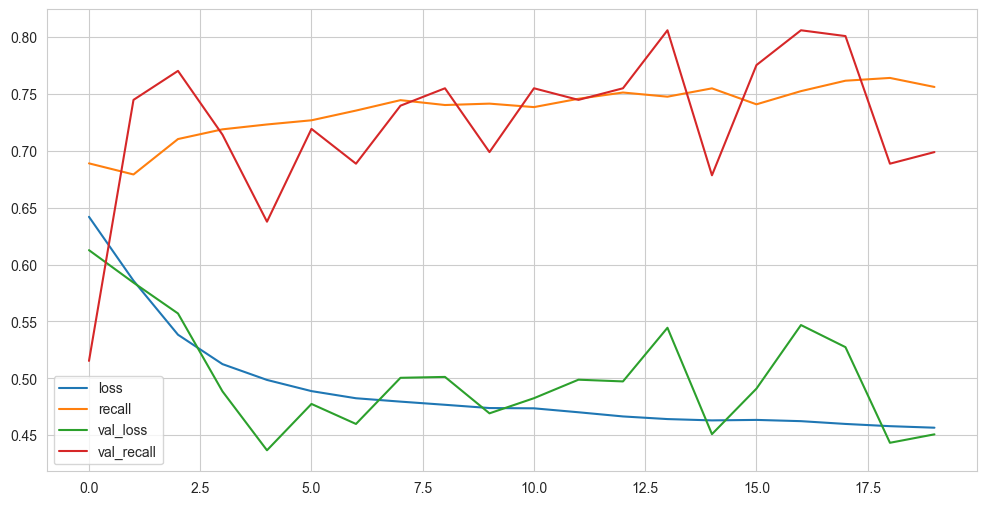

In [122]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [123]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[704  92]
 [ 85 119]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       796
           1       0.56      0.58      0.57       204

    accuracy                           0.82      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.83      0.82      0.82      1000



32/32 [==============================] - 0s 1ms/step


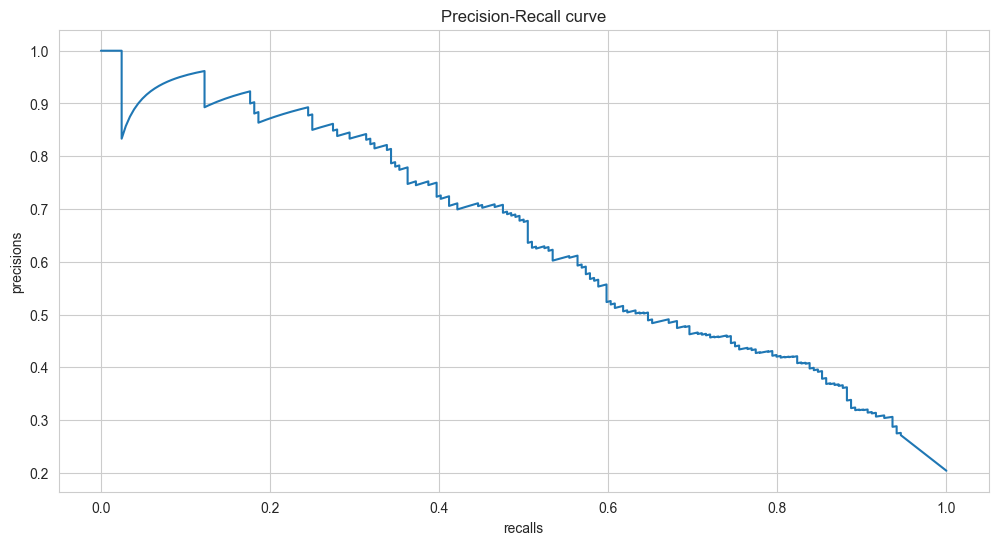

In [124]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN with large lerning rate')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [125]:
average_precision_score(y_test, y_pred_proba)

0.6395529523333651

### Add Dropout Layer

In [126]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.4))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [127]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1,class_weight=class_weights
)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.7069 - recall: 0.5009 - val_loss: 0.6796 - val_recall: 0.2857
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6844 - recall: 0.3329 - val_loss: 0.6724 - val_recall: 0.2704
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6786 - recall: 0.3158 - val_loss: 0.6718 - val_recall: 0.5000
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6752 - recall: 0.3219 - val_loss: 0.6563 - val_recall: 0.4694
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6692 - recall: 0.3824 - val_loss: 0.6461 - val_recall: 0.5051
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6603 - recall: 0.4123 - val_loss: 0.6362 - val_recall: 0.5969
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6562 - recall: 0.4606 - val_loss: 0.6282 - val_recall: 0.6224
Epoch 8/1000
254/254

254/254 [==============================] - 0s 1ms/step - loss: 0.5503 - recall: 0.6145 - val_loss: 0.4953 - val_recall: 0.6837
Epoch 118/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5512 - recall: 0.6084 - val_loss: 0.5220 - val_recall: 0.7500
Epoch 119/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5500 - recall: 0.6090 - val_loss: 0.5020 - val_recall: 0.6888
Epoch 120/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5471 - recall: 0.6347 - val_loss: 0.5274 - val_recall: 0.7245
Epoch 121/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5525 - recall: 0.6151 - val_loss: 0.4808 - val_recall: 0.6480
Epoch 122/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5420 - recall: 0.6231 - val_loss: 0.5071 - val_recall: 0.7398
Epoch 123/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5520 - recall: 0.6109 - val_loss: 0.5033 - val_recall: 0.6735
Epoch 124/1000
254/25

Epoch 175/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5490 - recall: 0.6286 - val_loss: 0.4880 - val_recall: 0.6888
Epoch 176/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5470 - recall: 0.6298 - val_loss: 0.5229 - val_recall: 0.7653
Epoch 177/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5492 - recall: 0.6213 - val_loss: 0.4920 - val_recall: 0.6837
Epoch 178/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5460 - recall: 0.6176 - val_loss: 0.5011 - val_recall: 0.7245
Epoch 179/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5431 - recall: 0.6097 - val_loss: 0.4985 - val_recall: 0.7194
Epoch 180/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5499 - recall: 0.6133 - val_loss: 0.4835 - val_recall: 0.6837
Epoch 181/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5515 - recall: 0.6304 - val_loss: 0.4857 - val_recall: 0.6837
Epoch 

Epoch 233/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5414 - recall: 0.6206 - val_loss: 0.4989 - val_recall: 0.7143
Epoch 234/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5448 - recall: 0.6200 - val_loss: 0.4849 - val_recall: 0.6837
Epoch 235/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5375 - recall: 0.6286 - val_loss: 0.5103 - val_recall: 0.7194
Epoch 236/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5476 - recall: 0.6133 - val_loss: 0.4923 - val_recall: 0.7092
Epoch 237/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5491 - recall: 0.6188 - val_loss: 0.4809 - val_recall: 0.6939
Epoch 238/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5548 - recall: 0.5974 - val_loss: 0.4820 - val_recall: 0.6939
Epoch 239/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5532 - recall: 0.6139 - val_loss: 0.4999 - val_recall: 0.6990
Epoch 

Epoch 291/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5362 - recall: 0.6445 - val_loss: 0.4895 - val_recall: 0.7449
Epoch 292/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5446 - recall: 0.6090 - val_loss: 0.4763 - val_recall: 0.7041
Epoch 293/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5400 - recall: 0.6402 - val_loss: 0.4986 - val_recall: 0.7143
Epoch 294/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5437 - recall: 0.6231 - val_loss: 0.5020 - val_recall: 0.7041
Epoch 295/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5389 - recall: 0.6261 - val_loss: 0.4935 - val_recall: 0.7092
Epoch 296/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5381 - recall: 0.6341 - val_loss: 0.5061 - val_recall: 0.7245
Epoch 297/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5475 - recall: 0.6243 - val_loss: 0.5014 - val_recall: 0.7143
Epoch 

Epoch 349/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5444 - recall: 0.6426 - val_loss: 0.4923 - val_recall: 0.7347
Epoch 350/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5474 - recall: 0.6329 - val_loss: 0.4842 - val_recall: 0.7041
Epoch 351/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5437 - recall: 0.6255 - val_loss: 0.4743 - val_recall: 0.6786
Epoch 352/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5360 - recall: 0.6475 - val_loss: 0.5079 - val_recall: 0.7806
Epoch 353/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5494 - recall: 0.6127 - val_loss: 0.4762 - val_recall: 0.6786
Epoch 354/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5385 - recall: 0.6298 - val_loss: 0.4725 - val_recall: 0.7092
Epoch 355/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5437 - recall: 0.6225 - val_loss: 0.4758 - val_recall: 0.7296
Epoch 

Epoch 407/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5334 - recall: 0.6323 - val_loss: 0.4663 - val_recall: 0.7194
Epoch 408/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5411 - recall: 0.6194 - val_loss: 0.5035 - val_recall: 0.7908
Epoch 409/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5451 - recall: 0.6310 - val_loss: 0.5146 - val_recall: 0.8010
Epoch 410/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5438 - recall: 0.6396 - val_loss: 0.4742 - val_recall: 0.7092
Epoch 411/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5432 - recall: 0.6133 - val_loss: 0.4970 - val_recall: 0.7653
Epoch 412/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5460 - recall: 0.6243 - val_loss: 0.4885 - val_recall: 0.7653
Epoch 413/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5462 - recall: 0.6206 - val_loss: 0.4817 - val_recall: 0.7449
Epoch 

Epoch 465/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5463 - recall: 0.6097 - val_loss: 0.5219 - val_recall: 0.7653
Epoch 466/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5441 - recall: 0.6176 - val_loss: 0.4968 - val_recall: 0.7347
Epoch 467/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5421 - recall: 0.6365 - val_loss: 0.4719 - val_recall: 0.6888
Epoch 468/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5403 - recall: 0.6268 - val_loss: 0.4850 - val_recall: 0.7296
Epoch 469/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5493 - recall: 0.6219 - val_loss: 0.4933 - val_recall: 0.7551
Epoch 470/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5383 - recall: 0.6426 - val_loss: 0.4956 - val_recall: 0.7653
Epoch 471/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5462 - recall: 0.6261 - val_loss: 0.4877 - val_recall: 0.7194
Epoch 

Epoch 523/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5483 - recall: 0.6371 - val_loss: 0.5062 - val_recall: 0.7449
Epoch 524/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5456 - recall: 0.6323 - val_loss: 0.5111 - val_recall: 0.7602
Epoch 525/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5445 - recall: 0.6225 - val_loss: 0.4902 - val_recall: 0.7347
Epoch 526/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5442 - recall: 0.6237 - val_loss: 0.4715 - val_recall: 0.6786
Epoch 527/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5396 - recall: 0.6286 - val_loss: 0.4796 - val_recall: 0.7296
Epoch 528/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5391 - recall: 0.6231 - val_loss: 0.4995 - val_recall: 0.7602
Epoch 529/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5421 - recall: 0.6286 - val_loss: 0.4772 - val_recall: 0.7347
Epoch 

Epoch 581/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5349 - recall: 0.6439 - val_loss: 0.5006 - val_recall: 0.7704
Epoch 582/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5454 - recall: 0.6298 - val_loss: 0.4838 - val_recall: 0.6939
Epoch 583/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5423 - recall: 0.6200 - val_loss: 0.4873 - val_recall: 0.6939
Epoch 584/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5499 - recall: 0.6035 - val_loss: 0.4947 - val_recall: 0.7449
Epoch 585/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5472 - recall: 0.6225 - val_loss: 0.4905 - val_recall: 0.7296
Epoch 586/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5420 - recall: 0.6115 - val_loss: 0.4788 - val_recall: 0.6990
Epoch 587/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5499 - recall: 0.6188 - val_loss: 0.4900 - val_recall: 0.7143
Epoch 

Epoch 639/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5434 - recall: 0.6188 - val_loss: 0.4934 - val_recall: 0.7704
Epoch 640/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5346 - recall: 0.6451 - val_loss: 0.4914 - val_recall: 0.7347
Epoch 641/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5554 - recall: 0.6115 - val_loss: 0.4818 - val_recall: 0.7500
Epoch 642/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5412 - recall: 0.6365 - val_loss: 0.4823 - val_recall: 0.7704
Epoch 643/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5449 - recall: 0.6286 - val_loss: 0.4946 - val_recall: 0.7602
Epoch 644/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5447 - recall: 0.6200 - val_loss: 0.4911 - val_recall: 0.7347
Epoch 645/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5420 - recall: 0.6286 - val_loss: 0.4918 - val_recall: 0.7653
Epoch 

Epoch 697/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5377 - recall: 0.6359 - val_loss: 0.4890 - val_recall: 0.7551
Epoch 698/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5430 - recall: 0.6280 - val_loss: 0.4954 - val_recall: 0.7602
Epoch 699/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5378 - recall: 0.6335 - val_loss: 0.4939 - val_recall: 0.7449
Epoch 700/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5404 - recall: 0.6426 - val_loss: 0.4883 - val_recall: 0.7704
Epoch 701/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5367 - recall: 0.6469 - val_loss: 0.4725 - val_recall: 0.7194
Epoch 702/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5397 - recall: 0.6347 - val_loss: 0.4963 - val_recall: 0.7551
Epoch 703/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5431 - recall: 0.6384 - val_loss: 0.4929 - val_recall: 0.7398
Epoch 

Epoch 755/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5321 - recall: 0.6481 - val_loss: 0.4832 - val_recall: 0.7143
Epoch 756/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5456 - recall: 0.6121 - val_loss: 0.4946 - val_recall: 0.7653
Epoch 757/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5460 - recall: 0.6286 - val_loss: 0.4802 - val_recall: 0.7092
Epoch 758/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5416 - recall: 0.6158 - val_loss: 0.4866 - val_recall: 0.7041
Epoch 759/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5323 - recall: 0.6549 - val_loss: 0.4655 - val_recall: 0.6786
Epoch 760/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5429 - recall: 0.6078 - val_loss: 0.5044 - val_recall: 0.8061
Epoch 761/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5465 - recall: 0.6371 - val_loss: 0.4781 - val_recall: 0.7245
Epoch 

Epoch 813/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5433 - recall: 0.6426 - val_loss: 0.4770 - val_recall: 0.7296
Epoch 814/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5391 - recall: 0.6243 - val_loss: 0.4812 - val_recall: 0.7143
Epoch 815/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5429 - recall: 0.6237 - val_loss: 0.4761 - val_recall: 0.7296
Epoch 816/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5391 - recall: 0.6127 - val_loss: 0.4840 - val_recall: 0.7551
Epoch 817/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5441 - recall: 0.6243 - val_loss: 0.5012 - val_recall: 0.7653
Epoch 818/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5448 - recall: 0.6323 - val_loss: 0.4799 - val_recall: 0.6990
Epoch 819/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5454 - recall: 0.5925 - val_loss: 0.4739 - val_recall: 0.7194
Epoch 

Epoch 871/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5341 - recall: 0.6487 - val_loss: 0.4876 - val_recall: 0.7143
Epoch 872/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5420 - recall: 0.5999 - val_loss: 0.4802 - val_recall: 0.7092
Epoch 873/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5380 - recall: 0.6420 - val_loss: 0.4882 - val_recall: 0.7245
Epoch 874/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5436 - recall: 0.6090 - val_loss: 0.4919 - val_recall: 0.7500
Epoch 875/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5325 - recall: 0.6659 - val_loss: 0.4743 - val_recall: 0.7194
Epoch 876/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5400 - recall: 0.6268 - val_loss: 0.4803 - val_recall: 0.7296
Epoch 877/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5444 - recall: 0.6158 - val_loss: 0.4865 - val_recall: 0.7245
Epoch 

Epoch 929/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5404 - recall: 0.6151 - val_loss: 0.4857 - val_recall: 0.7551
Epoch 930/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5362 - recall: 0.6408 - val_loss: 0.4845 - val_recall: 0.7194
Epoch 931/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5417 - recall: 0.6151 - val_loss: 0.4920 - val_recall: 0.6888
Epoch 932/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5354 - recall: 0.6261 - val_loss: 0.4941 - val_recall: 0.7296
Epoch 933/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5441 - recall: 0.6298 - val_loss: 0.4775 - val_recall: 0.7143
Epoch 934/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5417 - recall: 0.6298 - val_loss: 0.4788 - val_recall: 0.7296
Epoch 935/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5461 - recall: 0.6170 - val_loss: 0.4823 - val_recall: 0.7296
Epoch 

Epoch 987/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5426 - recall: 0.6304 - val_loss: 0.5095 - val_recall: 0.7551
Epoch 988/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5409 - recall: 0.6298 - val_loss: 0.4770 - val_recall: 0.6939
Epoch 989/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5332 - recall: 0.6261 - val_loss: 0.4917 - val_recall: 0.7347
Epoch 990/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5397 - recall: 0.6353 - val_loss: 0.4823 - val_recall: 0.7398
Epoch 991/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5425 - recall: 0.6298 - val_loss: 0.4855 - val_recall: 0.7296
Epoch 992/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5391 - recall: 0.6335 - val_loss: 0.4832 - val_recall: 0.7143
Epoch 993/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5391 - recall: 0.6310 - val_loss: 0.4636 - val_recall: 0.7041
Epoch 

<Axes: >

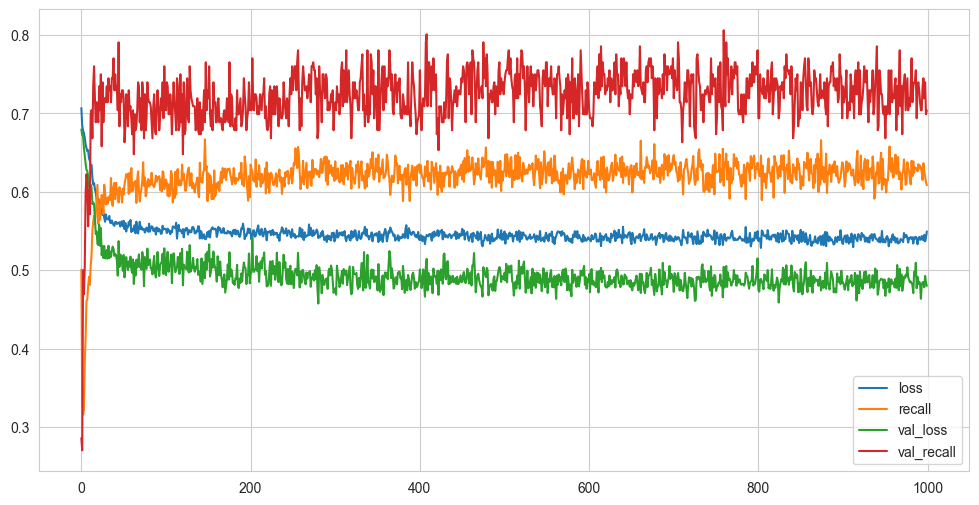

In [128]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [129]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[683 113]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       796
           1       0.55      0.68      0.61       204

    accuracy                           0.82      1000
   macro avg       0.73      0.77      0.75      1000
weighted avg       0.84      0.82      0.83      1000



32/32 [==============================] - 0s 1ms/step


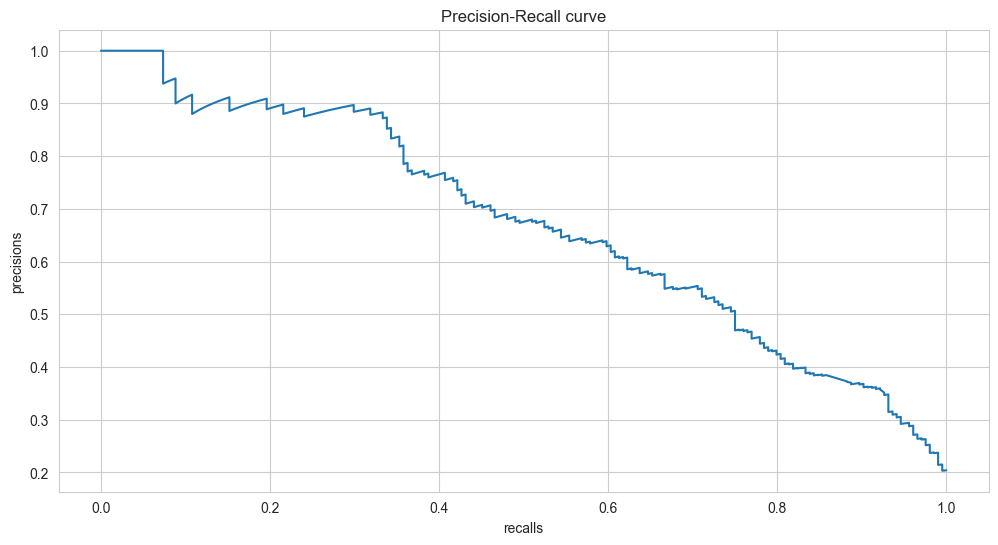

In [130]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN with large lerning rate')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [131]:
average_precision_score(y_test, y_pred_proba)

0.67161226490575

### Add Early Stop

#### Monitor the "val_loss" as metric

In [132]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam", 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [133]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=15)

In [134]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
64/64 [==============================] - 1s 4ms/step - loss: 0.6887 - recall: 0.4337 - val_loss: 0.7063 - val_recall: 0.8776
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6734 - recall: 0.7960 - val_loss: 0.7163 - val_recall: 0.8316
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6541 - recall: 0.7276 - val_loss: 0.6954 - val_recall: 0.7449
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6272 - recall: 0.6683 - val_loss: 0.6357 - val_recall: 0.6378
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6115 - recall: 0.6542 - val_loss: 0.6184 - val_recall: 0.6378
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6021 - recall: 0.6536 - val_loss: 0.6188 - val_recall: 0.6888
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5951 - recall: 0.6634 - val_loss: 0.6108 - val_recall: 0.6990
Epoch 8/1000
64/64 [==============

64/64 [==============================] - 0s 2ms/step - loss: 0.4681 - recall: 0.7611 - val_loss: 0.4691 - val_recall: 0.7347
Epoch 61/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4679 - recall: 0.7514 - val_loss: 0.4784 - val_recall: 0.7500
Epoch 62/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4682 - recall: 0.7557 - val_loss: 0.4940 - val_recall: 0.7500
Epoch 63/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4673 - recall: 0.7630 - val_loss: 0.4695 - val_recall: 0.7347
Epoch 64/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4670 - recall: 0.7526 - val_loss: 0.4805 - val_recall: 0.7500
Epoch 65/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4655 - recall: 0.7611 - val_loss: 0.4586 - val_recall: 0.7092
Epoch 66/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4676 - recall: 0.7434 - val_loss: 0.4760 - val_recall: 0.7449
Epoch 67/1000
64/64 [====================

<Axes: >

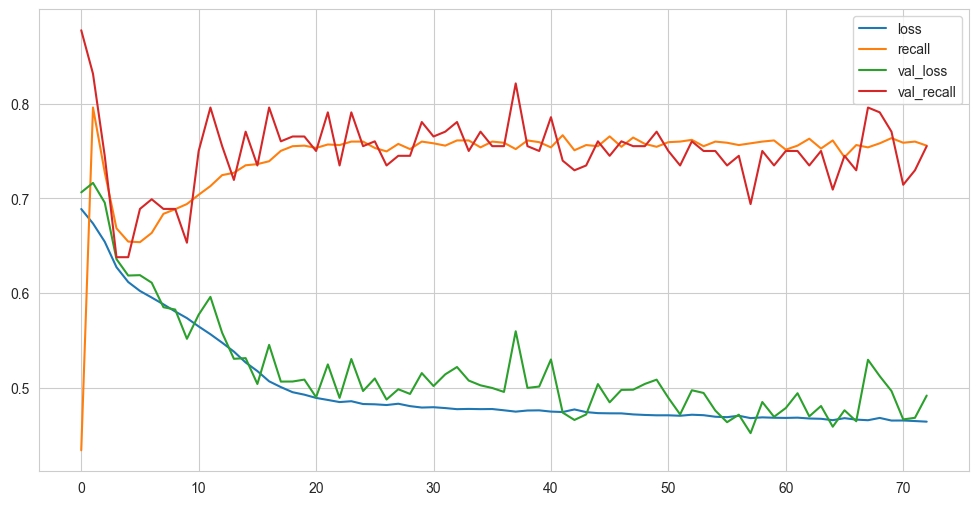

In [135]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [136]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 946us/step
[[623 173]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       796
           1       0.47      0.75      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



32/32 [==============================] - 0s 1ms/step


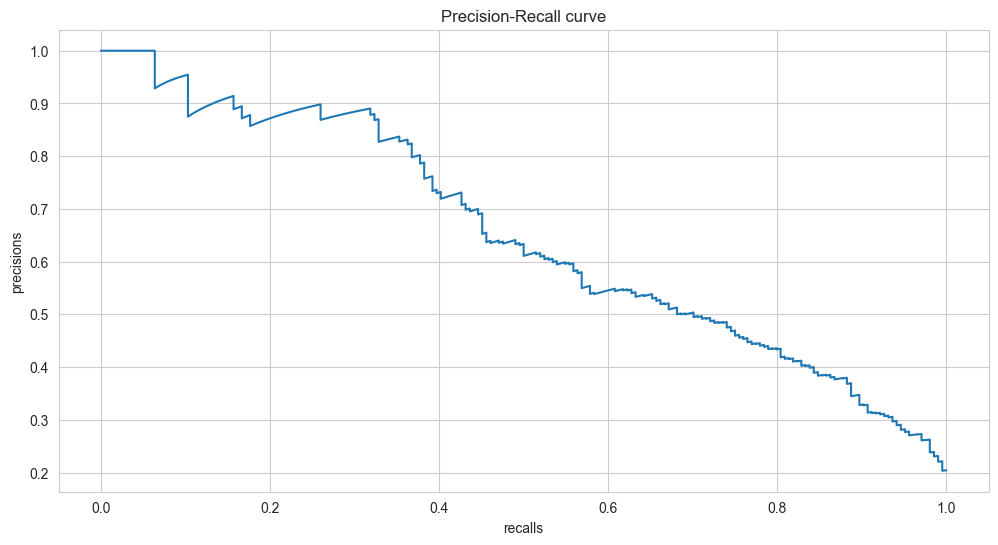

In [137]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN with large lerning rate')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [138]:
average_precision_score(y_test, y_pred_proba)

0.6508157452479338

#### Monitor the "val_recall" as metric

In [139]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam", 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [140]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="min",
                           verbose=1,
                           patience=15)

In [141]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
64/64 [==============================] - 1s 4ms/step - loss: 0.6969 - recall: 0.9194 - val_loss: 0.7068 - val_recall: 0.7092
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6840 - recall: 0.6982 - val_loss: 0.7080 - val_recall: 0.6888
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6715 - recall: 0.6927 - val_loss: 0.7245 - val_recall: 0.7653
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6595 - recall: 0.7214 - val_loss: 0.7150 - val_recall: 0.6837
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6493 - recall: 0.7007 - val_loss: 0.7013 - val_recall: 0.6378
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6402 - recall: 0.7056 - val_loss: 0.6983 - val_recall: 0.6888
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6318 - recall: 0.6982 - val_loss: 0.6976 - val_recall: 0.7194
Epoch 8/1000
64/64 [==============

<Axes: >

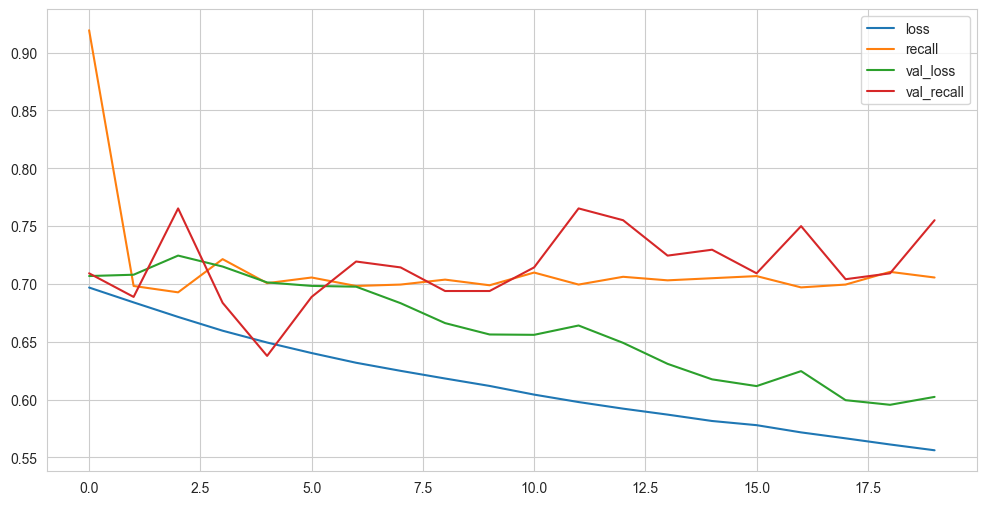

In [142]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [143]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[588 208]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       796
           1       0.42      0.74      0.54       204

    accuracy                           0.74      1000
   macro avg       0.67      0.74      0.68      1000
weighted avg       0.82      0.74      0.76      1000



32/32 [==============================] - 0s 1ms/step


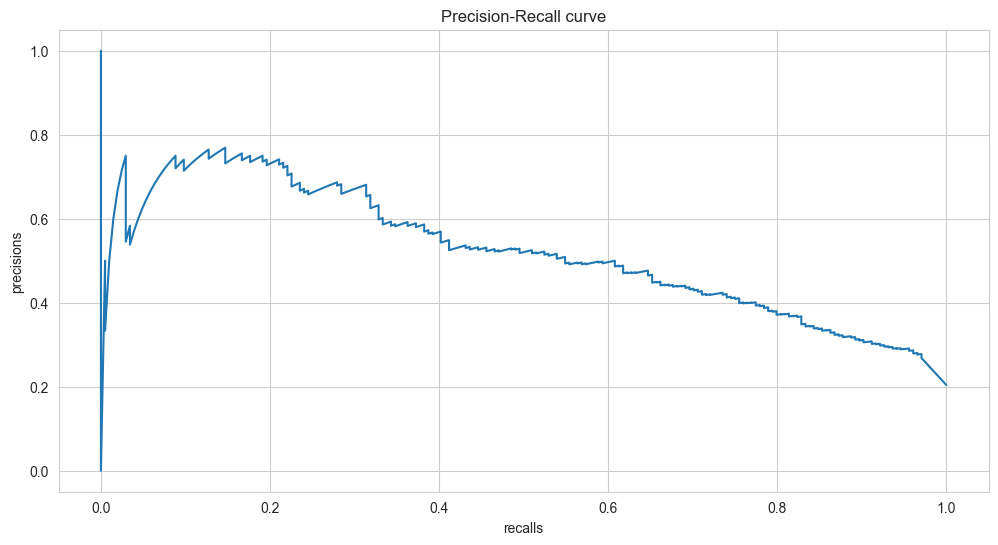

In [144]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN with large lerning rate')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [145]:
average_precision_score(y_test, y_pred_proba)

0.5220546802243078

## Optuna

In [146]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [147]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [148]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=100,
    callbacks=[early_stop],
    verbose=1, class_weight=class_weights
)

Epoch 1/100
127/127 [==============================] - 1s 3ms/step - loss: 0.7670 - recall: 0.6145 - val_loss: 0.4937 - val_recall: 0.6327
Epoch 2/100
127/127 [==============================] - 0s 2ms/step - loss: 0.5598 - recall: 0.7245 - val_loss: 0.5617 - val_recall: 0.7653
Epoch 3/100
127/127 [==============================] - 0s 2ms/step - loss: 0.5237 - recall: 0.7147 - val_loss: 0.5309 - val_recall: 0.7347
Epoch 4/100
127/127 [==============================] - 0s 2ms/step - loss: 0.5180 - recall: 0.7049 - val_loss: 0.4032 - val_recall: 0.5459
Epoch 5/100
127/127 [==============================] - 0s 2ms/step - loss: 0.5097 - recall: 0.7031 - val_loss: 0.4604 - val_recall: 0.5969
Epoch 6/100
127/127 [==============================] - 0s 2ms/step - loss: 0.5091 - recall: 0.6952 - val_loss: 0.4034 - val_recall: 0.5816
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 0.5053 - recall: 0.6897 - val_loss: 0.5132 - val_recall: 0.6888
Epoch 8/100
127/127 [======

In [149]:
history = model.history.history

In [150]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[737  59]
 [102 102]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       796
           1       0.63      0.50      0.56       204

    accuracy                           0.84      1000
   macro avg       0.76      0.71      0.73      1000
weighted avg       0.83      0.84      0.83      1000



In [154]:
model.save('model_optuna_with_classweight.h5')

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 1ms/step


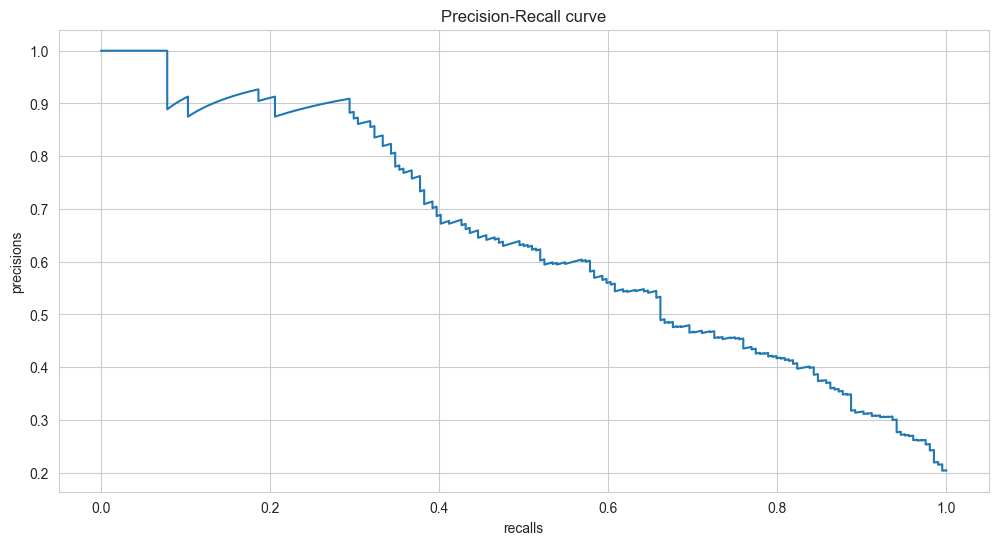

In [152]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN with large lerning rate')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [153]:
average_precision_score(y_test, y_pred_proba)

0.6451244749988299

# Final Model and Model Deployment

In [29]:
from tensorflow.keras.models import load_model

In [30]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [31]:
model_churn = load_model("model_optuna_with_classweight.h5")


In [32]:
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [33]:
churn = scaler_churn.transform(df.drop("Exited", axis=1))
churn

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 0.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
(model_churn.predict(churn) > 0.5).astype("int32")

313/313 [==============================] - 0s 809us/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [37]:
df["churn_predicted"] = (model_churn.predict(churn) > 0.5).astype("int32")

313/313 [==============================] - 0s 855us/step


In [38]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
RowNumber                                                                  
1                  619   42       2      0.000              1          1   
2                  608   41       1  83807.860              1          0   
3                  502   42       8 159660.800              3          1   
4                  699   39       1      0.000              2          0   
5                  850   43       2 125510.820              1          1   

           IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
RowNumber                                                               
1                       1       101348.880       1                  0   
2                       1       112542.580       0                  0   
3                       0       113931.570       1                  0   
4                       0        93826.630       0                  0   
5                       1        79084.100       0                  0   

           Geography_Spain  Gender_Male  churn_predicted  
RowNumber                                                 
1                        0            0                0  
2                        1            0                0  
3                        0            0                1  
4                        0            0                0  
5                        1            0                0

In [39]:
df[["Exited", "churn_predicted"]]

Exited  churn_predicted
RowNumber                         
1               1                0
2               0                0
3               1                1
4               0                0
5               0                0
...           ...              ...
9996            0                0
9997            0                0
9998            1                0
9999            1                0
10000           0                0

[10000 rows x 2 columns]

In [43]:
df[df["Exited"] == df["churn_predicted"]].shape[0]/df.shape[0]*100

83.72

In [ ]:
single_churn = df.drop("Exited", axis=1).iloc[6:7, :]
single_churn

In [170]:
single_churn = scaler_churn.transform(single_churn)
single_churn

array([[0.944     , 0.43243243, 0.7       , 0.        , 0.33333333,
        1.        , 1.        , 0.0502609 , 0.        , 0.        ,
        1.        ]])

In [171]:
(model_churn.predict(single_churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 27ms/step


array([[0]])

In [172]:
model_churn.predict(single_churn)

1/1 [==============================] - 0s 18ms/step


array([[0.01160808]], dtype=float32)

In [174]:
df["Exited"].iloc[6]

0

# APPENDIX DIFFERENT APPROACHES

# 2 DENSE LAYERS WITH CLASS WEIGHT (Recall Score 77)

In [49]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [50]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [52]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
64/64 [==============================] - 1s 4ms/step - loss: 0.6954 - recall: 0.9890 - val_loss: 0.7216 - val_recall: 0.9439
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6797 - recall: 0.8271 - val_loss: 0.7137 - val_recall: 0.7908
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6632 - recall: 0.7025 - val_loss: 0.6939 - val_recall: 0.7041
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6327 - recall: 0.6426 - val_loss: 0.6457 - val_recall: 0.6173
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6174 - recall: 0.6371 - val_loss: 0.6282 - val_recall: 0.6327
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6061 - recall: 0.6536 - val_loss: 0.6105 - val_recall: 0.6633
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5926 - recall: 0.6836 - val_loss: 0.5946 - val_recall: 0.6684
Epoch 8/1000
64/64 [==============

64/64 [==============================] - 0s 2ms/step - loss: 0.4576 - recall: 0.7679 - val_loss: 0.4573 - val_recall: 0.7500
Epoch 61/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4576 - recall: 0.7593 - val_loss: 0.4726 - val_recall: 0.7602
Epoch 62/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4570 - recall: 0.7526 - val_loss: 0.4888 - val_recall: 0.7806
Epoch 63/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4565 - recall: 0.7605 - val_loss: 0.4719 - val_recall: 0.7653
Epoch 64/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4557 - recall: 0.7587 - val_loss: 0.4779 - val_recall: 0.7653
Epoch 65/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4553 - recall: 0.7709 - val_loss: 0.4534 - val_recall: 0.7449
Epoch 66/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4562 - recall: 0.7550 - val_loss: 0.4737 - val_recall: 0.7653
Epoch 67/1000
64/64 [====================

<Axes: >

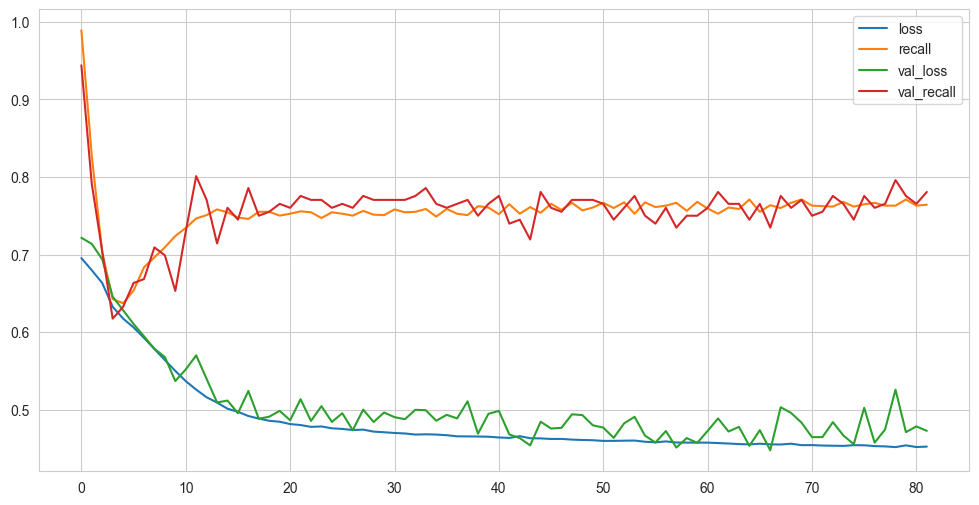

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [54]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[626 170]
 [ 47 157]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.77      0.59       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



32/32 [==============================] - 0s 1ms/step


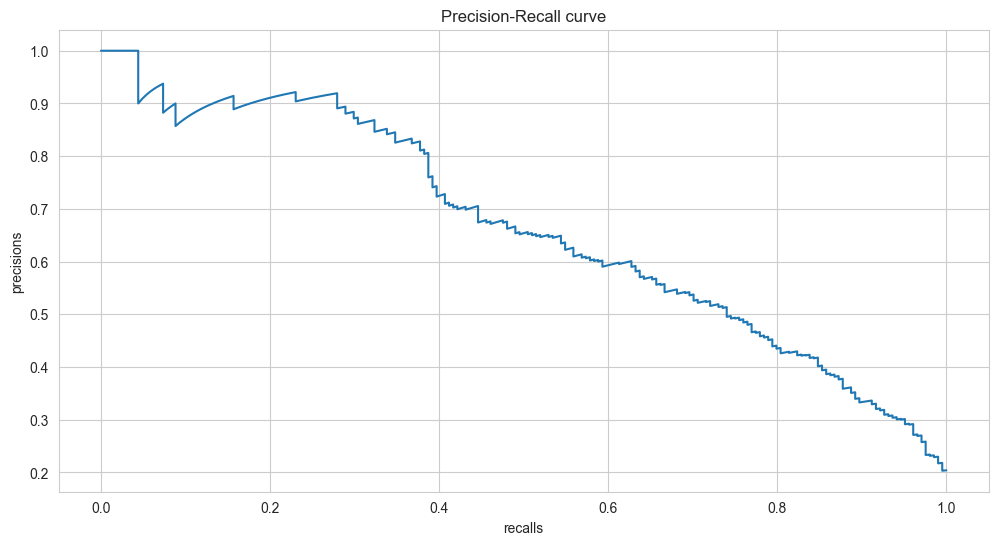

In [55]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [56]:
average_precision_score(y_test, y_pred_proba)



0.6645969430963337

# 4 DENSE LAYERS WITH CLASS WEIGHT (Recall Score 73)# 

In [57]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [58]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
64/64 [==============================] - 1s 4ms/step - loss: 0.6881 - recall: 0.0092 - val_loss: 0.6559 - val_recall: 0.1276
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6681 - recall: 0.3708 - val_loss: 0.6119 - val_recall: 0.5153
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6352 - recall: 0.6158 - val_loss: 0.6123 - val_recall: 0.6276
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6046 - recall: 0.6842 - val_loss: 0.6179 - val_recall: 0.7194
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5848 - recall: 0.6995 - val_loss: 0.5980 - val_recall: 0.7602
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5709 - recall: 0.7092 - val_loss: 0.6182 - val_recall: 0.7857
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5638 - recall: 0.7135 - val_loss: 0.5630 - val_recall: 0.7296
Epoch 8/1000
64/64 [==============

<Axes: >

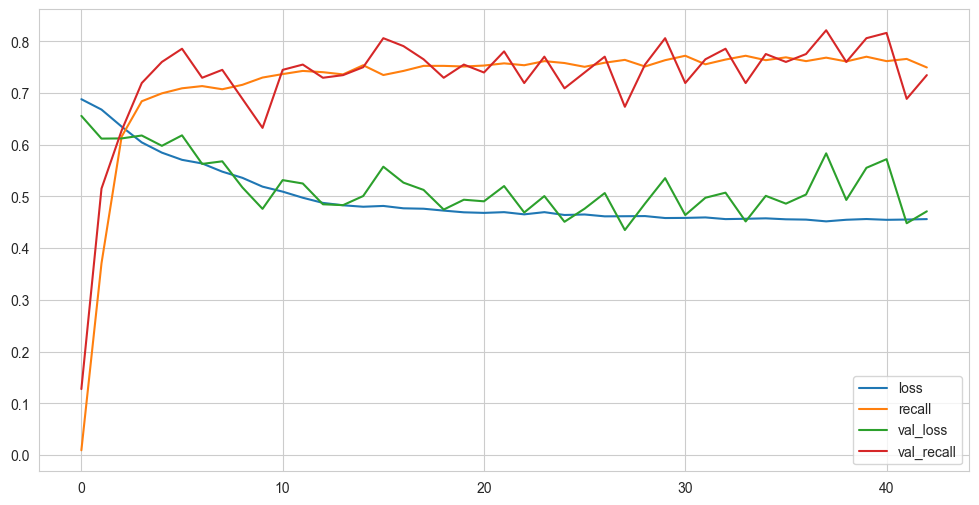

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [60]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[644 152]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.49      0.73      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.72      1000
weighted avg       0.83      0.79      0.81      1000



In [61]:
average_precision_score(y_test, y_pred_proba)

0.6645969430963337

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___